IMPORTING LIBRARIES

In [969]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

IMPORTING DATA

In [970]:
df = pd.read_csv("car-sales_train.csv")
df

Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545                  NaN   
153        Volvo      S70              15.245                  NaN   
154        Volvo      V70              17.531                  NaN   
155        Volvo      C70               3.493                  NaN   
156        Volvo      S80              18.969                  NaN   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      Passenger               28.40          3.2       225.0      108.1   
2      Passenger                 NaN          3.2       225.0      106.9   
3      Passenger               42.00          3.5       210.0      114.6   
4      Passenger               23.99          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger               24.40          1.9       160.0      100.5   
153    Passenger               27.50          2.4       168.0      104.9   
154    Passenger               28.80          2.4       168.0      104.9   
155    Passenger               45.50          2.3       236.0      104.9   
156    Passenger               36.00          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]

DATA SUMMARY

In [971]:
df.head(3)

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0                21.5          1.8       140.0      101.2   67.3   172.4   
1                28.4          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN

In [972]:
df.tail(3)

Manufacturer Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
154        Volvo   V70              17.531                  NaN    Passenger   
155        Volvo   C70               3.493                  NaN    Passenger   
156        Volvo   S80              18.969                  NaN    Passenger   

     Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
154                28.8          2.4       168.0      104.9   69.3   186.2   
155                45.5          2.3       236.0      104.9   71.5   185.7   
156                36.0          2.9       201.0      109.9   72.1   189.8   

     Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
154        3.259           17.9             25.0     6/25/2011   
155        3.601           18.5             23.0     4/26/2011   
156        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
154          71.155978  
155         101.623357  
156          85.735655

In [973]:
df.shape

(157, 16)

In [974]:
df.duplicated().sum()
# df.drop_duplicates(keep = "last")
# df.shape

0

In [975]:
# df.dtypes
df.info()

numerical_feats = df.dtypes[df.dtypes != "object"].index
# print("Number of Numerical features: ", len(numerical_feats))
print("Numerical features: ", numerical_feats)

categorical_feats = df.dtypes[df.dtypes == "object"].index
# print("Number of Categorical features: ", len(categorical_feats))
print("Categorical features: ", categorical_feats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [976]:
# columns of interest
# df["Price_in_thousands"].describe()
df.describe()

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000  149.500000  103.000000   68.400000  177.575000   
50%       3.000000  177.500000  107.000000   70.550000  187.900000   
75%       3.575000  215.000000  112.200000   73.425000  196.125000   
max       8.000000  450.000000  138.700000   79.900000  224.500000   

       Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count   155.000000     156.000000       154.000000         155.000000  
mean      3.378026      17.951923        23.844156          77.043591  
std       0.630502       3.887921         4.282706          25.142664  
min       1.895000      10.300000        15.000000          23.276272  
25%       2.971000      15.800000        21.000000          60.407707  
50%       3.342000      17.200000        24.000000          72.030917  
75%       3.799500      19.575000        26.000000          89.414878  
max       5.572000      32.000000        45.000000         188.144323

CATEGORICAL FEATURE ANALYSIS

Manufacturer

In [977]:
manufacturer_count = df.groupby("Manufacturer", dropna = False).size()
manufacturer_count

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

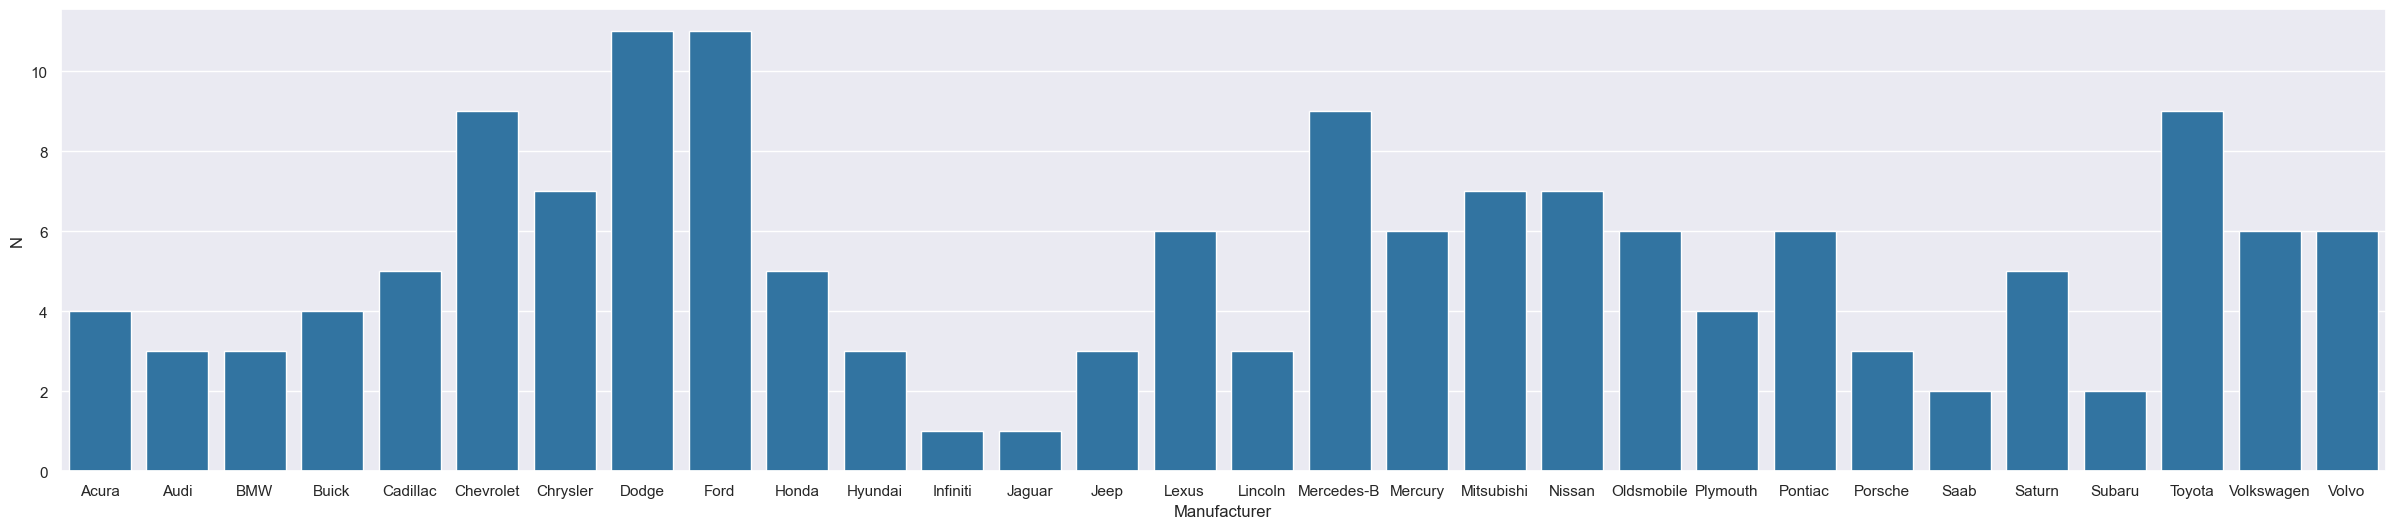

In [978]:
plt.figure(figsize = (30, 6))
sb.barplot(x = manufacturer_count.index, y = manufacturer_count.values, data = df, color = "blue", palette = ["tab:blue"])
plt.ylabel("N")
plt.show()

In [979]:
def max_min_val(column):
    my_max = df[column].idxmax()
    my_min = df[column].idxmin()
    my_max_ind = pd.DataFrame(df.loc[my_max])
    my_min_ind = pd.DataFrame(df.loc[my_min])
    max_min = pd.concat([my_max_ind, my_min_ind], axis = 1)
    return max_min

# ref: https://statisticsglobe.com/get-max-min-value-index-in-pandas-dataframe-python
# https://sparkbyexamples.com/pandas/pandas-dataframe-loc/

max_min_val("Price_in_thousands")

99         26
Manufacturer         Mercedes-B  Chevrolet
Model                     CL500      Metro
Sales_in_thousands        0.954     21.855
__year_resale_value         NaN       5.16
Vehicle_type          Passenger  Passenger
Price_in_thousands         85.5      9.235
Engine_size                 5.0        1.0
Horsepower                302.0       55.0
Wheelbase                 113.6       93.1
Width                      73.1       62.6
Length                    196.6      149.4
Curb_weight               4.115      1.895
Fuel_capacity              23.2       10.3
Fuel_efficiency            20.0       45.0
Latest_Launch         4/11/2011  4/13/2012
Power_perf_factor    141.100985  23.276272

In [980]:
Price_in_thousands_mean = df[["Manufacturer", "Price_in_thousands"]].groupby("Manufacturer", as_index = False).mean()
Price_in_thousands_mean

Manufacturer  Price_in_thousands
0         Acura           30.633333
1          Audi           39.980000
2           BMW           33.096667
3         Buick           26.781250
4      Cadillac           40.254000
5     Chevrolet           20.022778
6      Chrysler           23.430833
7         Dodge           24.213636
8          Ford           21.047273
9         Honda           20.277000
10      Hyundai           12.165667
11     Infiniti           29.465000
12       Jaguar           42.800000
13         Jeep           20.991667
14        Lexus           44.055000
15      Lincoln           41.690000
16   Mercedes-B           52.916667
17      Mercury           20.748333
18   Mitsubishi           22.167429
19       Nissan           22.360714
20   Oldsmobile           25.622833
21     Plymouth           22.642500
22      Pontiac           22.949167
23      Porsche           62.473333
24         Saab           29.610000
25       Saturn           14.271000
26       Subaru           21.395000
27       Toyota           21.982889
28   Volkswagen           17.698333
29        Volvo           30.933333

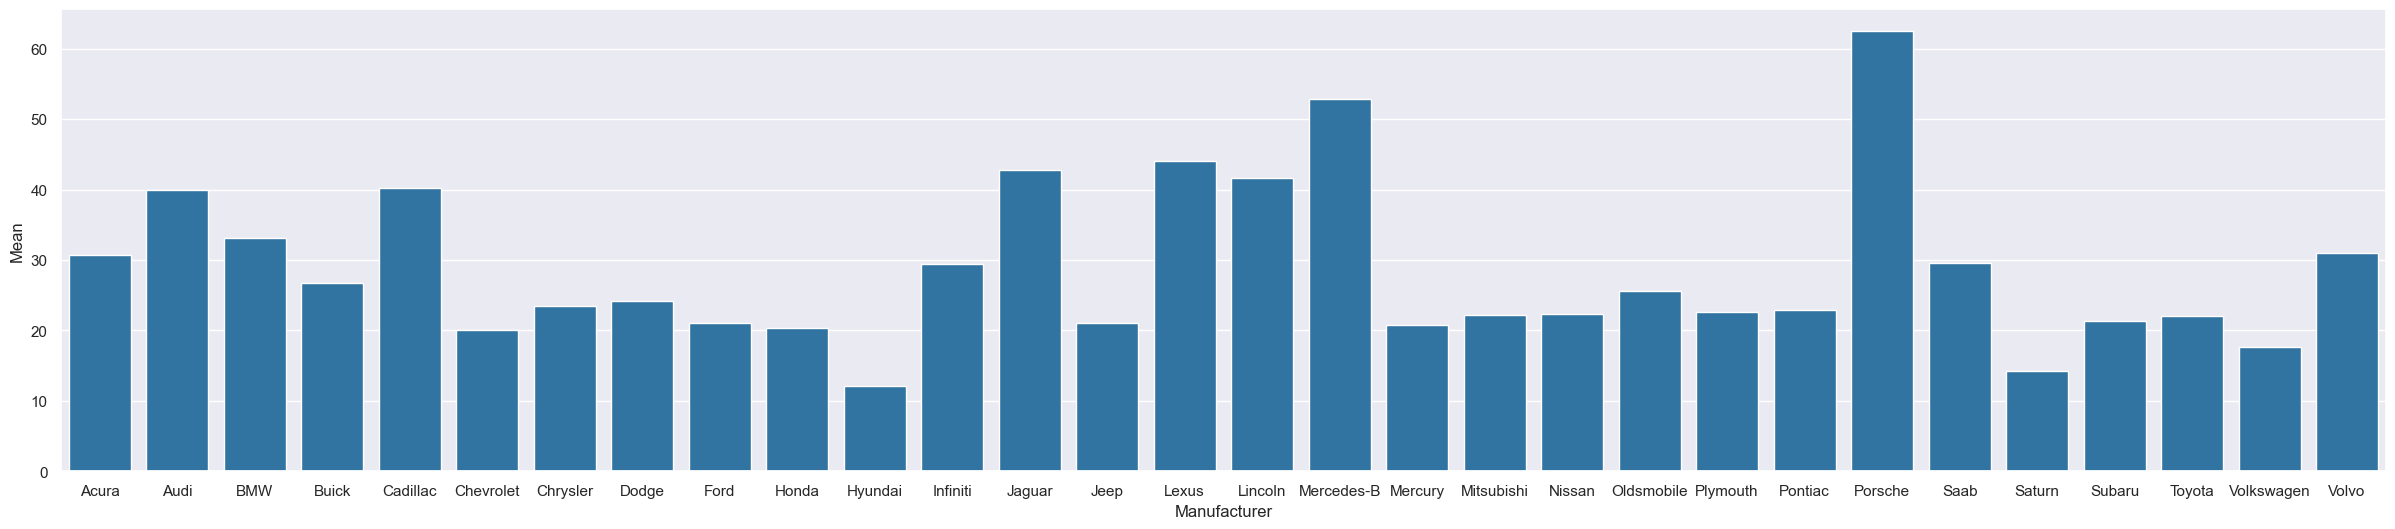

In [981]:
plt.figure(figsize = (30, 6))
sb.barplot(x = Price_in_thousands_mean["Manufacturer"], y = Price_in_thousands_mean["Price_in_thousands"], data = df, color = "blue", palette = ["tab:blue"])
plt.ylabel("Mean")
plt.show()

In [982]:
tier_1 = []
tier_2 = []

for i in range(len(Price_in_thousands_mean)):
    if Price_in_thousands_mean.iloc[i, 1] <= 30:
        tier_1.append(Price_in_thousands_mean.iloc[i, 0])
    else:
        tier_2.append(Price_in_thousands_mean.iloc[i, 0])

print("Tier 1: ", tier_1)
print("Tier 2: ", tier_2)

manufacturer_data1 = df["Manufacturer"]
manufacturer_data2 = []

for manufacturer in manufacturer_data1:
    if manufacturer in tier_1:
        manufacturer_data2.append(1)
    else:
        manufacturer_data2.append(2)

df["Manufacturer_tier"] = manufacturer_data2
change_loc = df.pop("Manufacturer_tier")
df.insert(1, "Manufacturer_tier", change_loc)

df

Tier 1:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Tier 2:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


Manufacturer  Manufacturer_tier    Model  Sales_in_thousands  \
0          Acura                  2  Integra              16.919   
1          Acura                  2       TL              39.384   
2          Acura                  2       CL              14.114   
3          Acura                  2       RL               8.588   
4           Audi                  2       A4              20.397   
..           ...                ...      ...                 ...   
152        Volvo                  2      V40               3.545   
153        Volvo                  2      S70              15.245   
154        Volvo                  2      V70              17.531   
155        Volvo                  2      C70               3.493   
156        Volvo                  2      S80              18.969   

     __year_resale_value Vehicle_type  Price_in_thousands  Engine_size  \
0                 16.360    Passenger               21.50          1.8   
1                 19.875    Passenger               28.40          3.2   
2                 18.225    Passenger                 NaN          3.2   
3                 29.725    Passenger               42.00          3.5   
4                 22.255    Passenger               23.99          1.8   
..                   ...          ...                 ...          ...   
152                  NaN    Passenger               24.40          1.9   
153                  NaN    Passenger               27.50          2.4   
154                  NaN    Passenger               28.80          2.4   
155                  NaN    Passenger               45.50          2.3   
156                  NaN    Passenger               36.00          2.9   

     Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0         140.0      101.2   67.3   172.4        2.639           13.2   
1         225.0      108.1   70.3   192.9        3.517           17.2   
2         225.0      106.9   70.6   192.0        3.470           17.2   
3         210.0      114.6   71.4   196.6        3.850           18.0   
4         150.0      102.6   68.2   178.0        2.998           16.4   
..          ...        ...    ...     ...          ...            ...   
152       160.0      100.5   67.6   176.6        3.042           15.8   
153       168.0      104.9   69.3   185.9        3.208           17.9   
154       168.0      104.9   69.3   186.2        3.259           17.9   
155       236.0      104.9   71.5   185.7        3.601           18.5   
156       201.0      109.9   72.1   189.8        3.600           21.1   

     Fuel_efficiency Latest_Launch  Power_perf_factor  
0               28.0      2/2/2012          58.280150  
1               25.0      6/3/2011          91.370778  
2               26.0      1/4/2012                NaN  
3               22.0     3/10/2011          91.389779  
4               27.0     10/8/2011          62.777639  
..               ...           ...                ...  
152             25.0     9/21/2011          66.498812  
153             25.0    11/24/2012          70.654495  
154             25.0     6/25/2011          71.155978  
155             23.0     4/26/2011         101.623357  
156             24.0    11/14/2011          85.735655  

[157 rows x 17 columns]

Vehicle_type

In [983]:
Vehicle_type_count = df.groupby("Vehicle_type", dropna = False).size()
Vehicle_type_count

Vehicle_type
Car           41
Passenger    116
dtype: int64

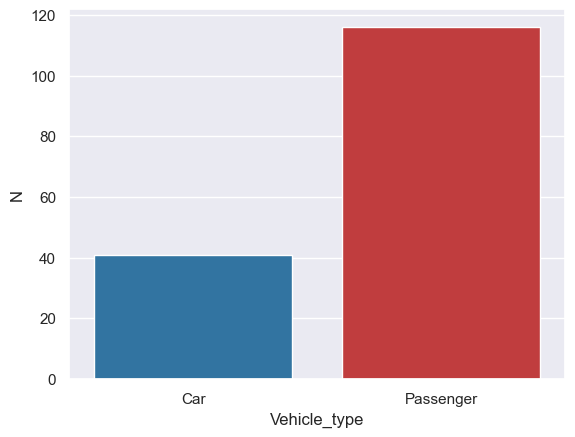

In [984]:
sb.barplot(x = Vehicle_type_count.index, y = Vehicle_type_count.values, data = df, color = "blue", palette = ["tab:blue", "tab:red"])
plt.ylabel("N")
plt.show()

In [985]:
Vehicle_type_mean = df[["Vehicle_type", "Price_in_thousands"]].groupby("Vehicle_type", as_index = False).mean()
Vehicle_type_mean

Vehicle_type  Price_in_thousands
0          Car           26.319975
1    Passenger           27.763200

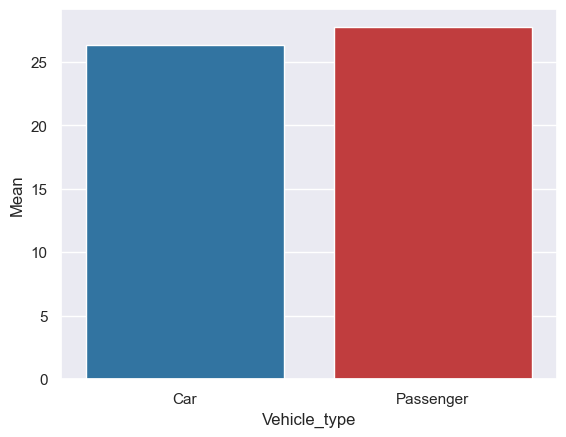

In [986]:
sb.barplot(x = Vehicle_type_mean["Vehicle_type"], y = Vehicle_type_mean["Price_in_thousands"], data = df, color = "blue", palette = ["tab:blue", "tab:red"])
plt.ylabel("Mean")
plt.show()

Latest_Launch

In [987]:
age = []
launch = df["Latest_Launch"]

for value in launch:
    year = int(value.split("/")[-1])
    age.append(2022 - year)

df["Age"] = age
df.head(5)

Manufacturer  Manufacturer_tier    Model  Sales_in_thousands  \
0        Acura                  2  Integra              16.919   
1        Acura                  2       TL              39.384   
2        Acura                  2       CL              14.114   
3        Acura                  2       RL               8.588   
4         Audi                  2       A4              20.397   

   __year_resale_value Vehicle_type  Price_in_thousands  Engine_size  \
0               16.360    Passenger               21.50          1.8   
1               19.875    Passenger               28.40          3.2   
2               18.225    Passenger                 NaN          3.2   
3               29.725    Passenger               42.00          3.5   
4               22.255    Passenger               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency Latest_Launch  Power_perf_factor  Age  
0             28.0      2/2/2012          58.280150   10  
1             25.0      6/3/2011          91.370778   11  
2             26.0      1/4/2012                NaN   10  
3             22.0     3/10/2011          91.389779   11  
4             27.0     10/8/2011          62.777639   11

Text(0.5, 1.0, 'Age Distribution')

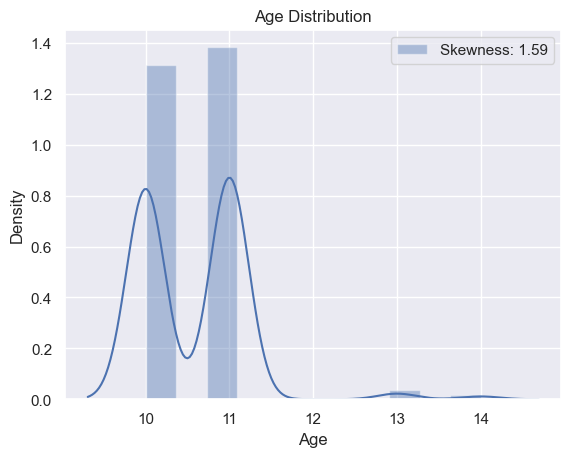

In [988]:
sb.distplot(df["Age"], label = "Skewness: %.2f"%(df["Age"].skew()))
plt.legend(loc = "best")
plt.title("Age Distribution")

NUMERICAL FEATURE ANALYSIS

In [989]:
# df.select_dtypes(include = ["float64"])
df.columns

Index(['Manufacturer', 'Manufacturer_tier', 'Model', 'Sales_in_thousands',
       '__year_resale_value', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'Age'],
      dtype='object')

Text(0.5, 1.0, 'Price_in_thousands Distribution')

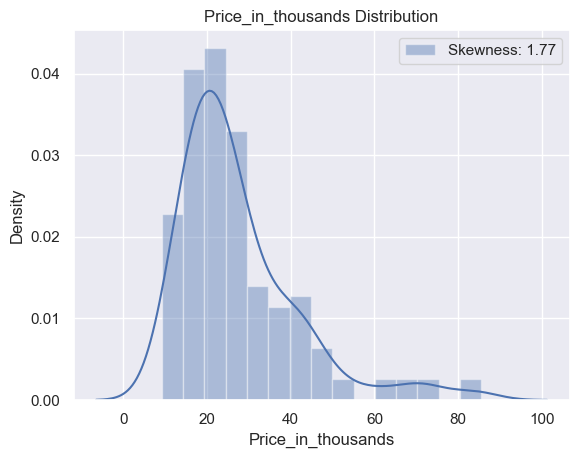

In [990]:
# histogram for continuous numerical variable
sb.distplot(df["Price_in_thousands"], label = "Skewness: %.2f"%(df["Price_in_thousands"].skew()))
plt.legend(loc = "best")
plt.title("Price_in_thousands Distribution")

Sales_in_thousands Skewness: 3.41
__year_resale_value Skewness: 2.29
Price_in_thousands Skewness: 1.77
Engine_size Skewness: 1.10
Horsepower Skewness: 1.00
Wheelbase Skewness: 0.97
Width Skewness: 0.48
Length Skewness: -0.06
Curb_weight Skewness: 0.71
Fuel_capacity Skewness: 1.14
Fuel_efficiency Skewness: 0.69
Power_perf_factor Skewness: 1.07


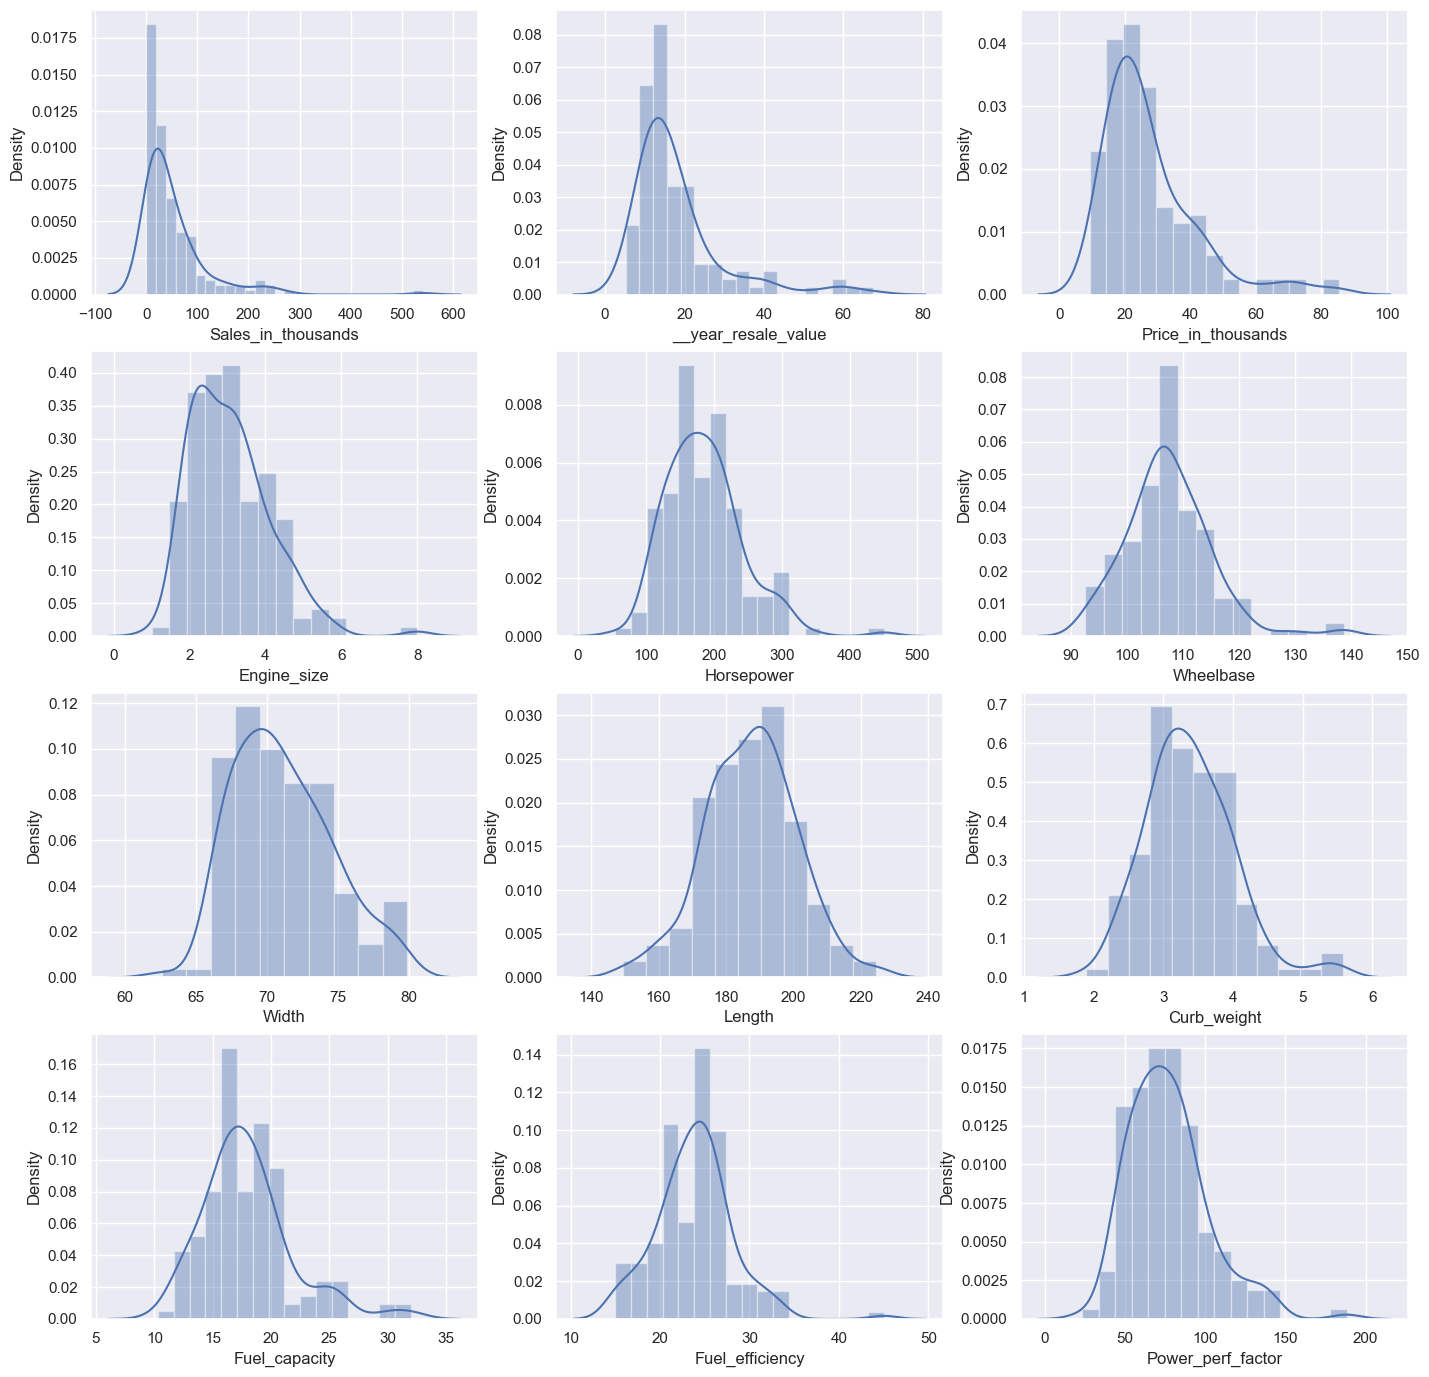

In [991]:
fig, axs = plt.subplots(4, 3, figsize = (17, 17))

# row 1
sb.distplot(df["Sales_in_thousands"], ax = axs[0, 0])
print("Sales_in_thousands Skewness: %.2f"%(df["Sales_in_thousands"].skew()))

sb.distplot(df["__year_resale_value"], ax = axs[0, 1])
print("__year_resale_value Skewness: %.2f"%(df["__year_resale_value"].skew()))

sb.distplot(df["Price_in_thousands"], ax = axs[0, 2])
print("Price_in_thousands Skewness: %.2f"%(df["Price_in_thousands"].skew()))

# row 2
sb.distplot(df["Engine_size"], ax = axs[1, 0])
print("Engine_size Skewness: %.2f"%(df["Engine_size"].skew()))

sb.distplot(df["Horsepower"], ax = axs[1, 1])
print("Horsepower Skewness: %.2f"%(df["Horsepower"].skew()))

sb.distplot(df["Wheelbase"], ax = axs[1, 2])
print("Wheelbase Skewness: %.2f"%(df["Wheelbase"].skew()))

# row 3
sb.distplot(df["Width"], ax = axs[2, 0])
print("Width Skewness: %.2f"%(df["Width"].skew()))

sb.distplot(df["Length"], ax = axs[2, 1])
print("Length Skewness: %.2f"%(df["Length"].skew()))

sb.distplot(df["Curb_weight"], ax = axs[2, 2])
print("Curb_weight Skewness: %.2f"%(df["Curb_weight"].skew()))

# row 4
sb.distplot(df["Fuel_capacity"], ax = axs[3, 0])
print("Fuel_capacity Skewness: %.2f"%(df["Fuel_capacity"].skew()))

sb.distplot(df["Fuel_efficiency"], ax = axs[3, 1])
print("Fuel_efficiency Skewness: %.2f"%(df["Fuel_efficiency"].skew()))

sb.distplot(df["Power_perf_factor"], ax = axs[3, 2])
print("Power_perf_factor Skewness: %.2f"%(df["Power_perf_factor"].skew()))

Text(0.5, 1.0, 'Correlation between Power_perf_factor and Price_in_thousands')

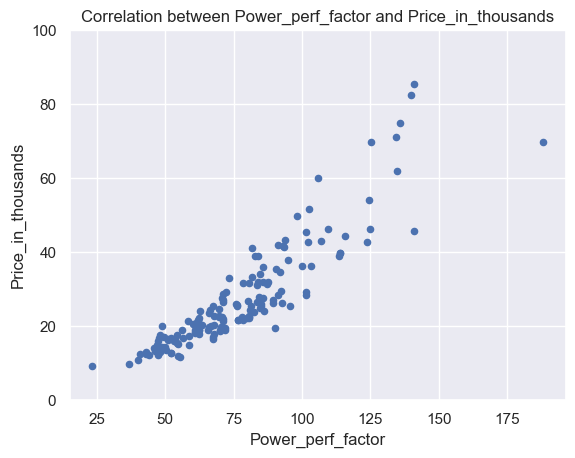

In [992]:
# test target with possible predictor Power_perf_factor/Price_in_thousands
var = "Power_perf_factor"
data = pd.concat([df["Price_in_thousands"], df[var]], axis = 1)
data.plot.scatter(x = var, y = "Price_in_thousands", ylim = (0,100))
plt.title("Correlation between Power_perf_factor and Price_in_thousands")

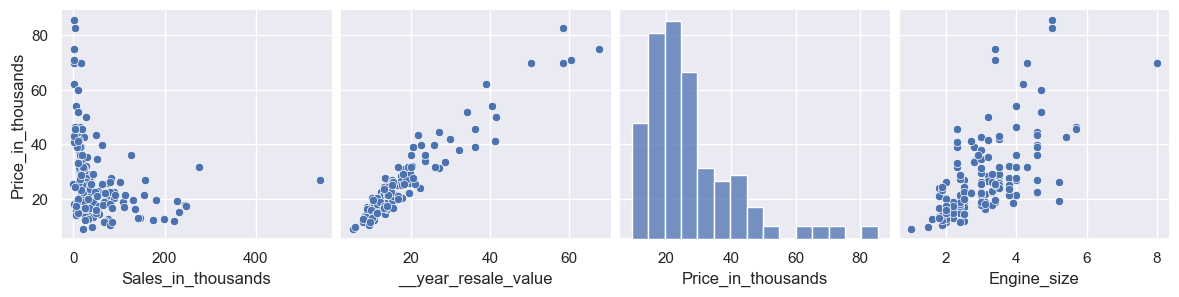

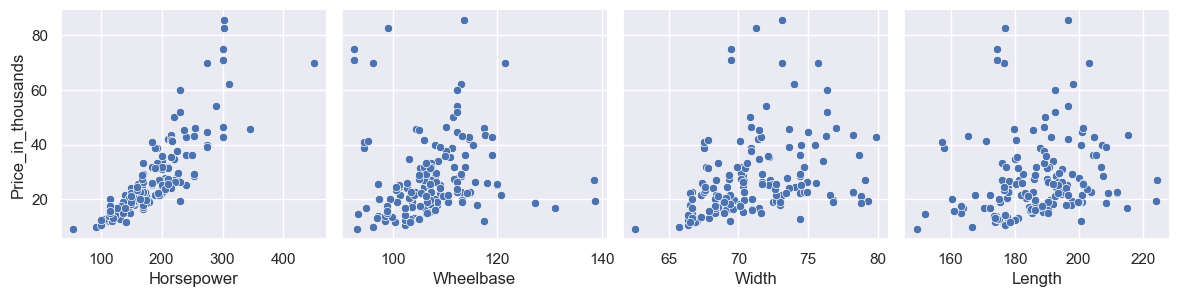

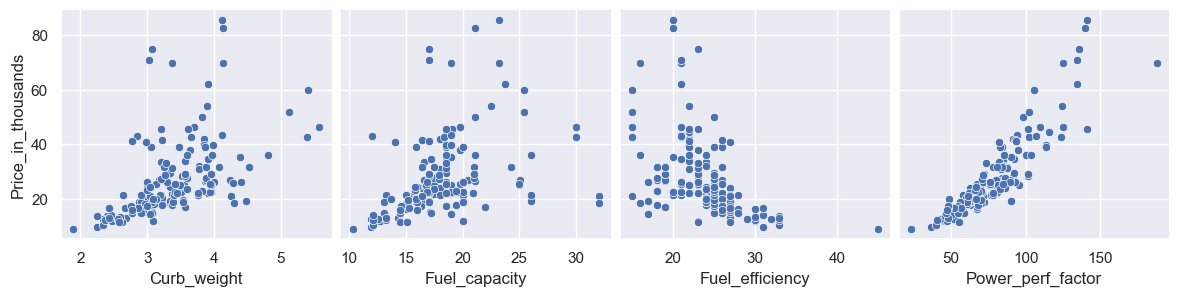

In [993]:
# scatterplot
sb.set()

row1 = ["Sales_in_thousands", "__year_resale_value", "Price_in_thousands", "Engine_size"]
sb.pairplot(df, y_vars = "Price_in_thousands", x_vars = df[row1], size = 3)

row2 = ["Horsepower", "Wheelbase", "Width", "Length"]
sb.pairplot(df, y_vars = "Price_in_thousands", x_vars = df[row2], size = 3)

row3 = ["Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"]
sb.pairplot(df, y_vars = "Price_in_thousands", x_vars = df[row3], size = 3)

plt.show()

Text(0.5, 1.0, 'Correlation between variables')

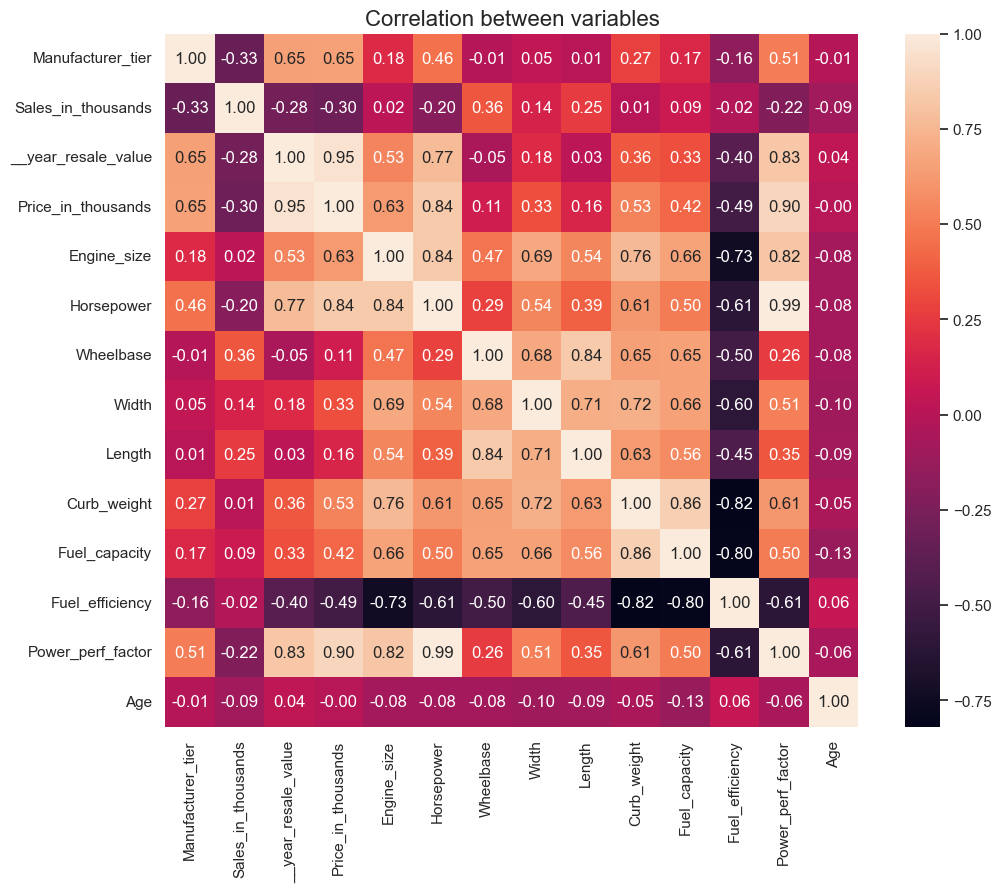

In [994]:
# correlation matrix
f, ax = plt.subplots(figsize = (12, 9))
sb.heatmap(df.corr(), vmax = 1, annot = True, square = True, fmt = ".2f")
plt.title("Correlation between variables", size = 16)

In [995]:
df_corr = df.corr()["Price_in_thousands"]
df_corr

Manufacturer_tier      0.652920
Sales_in_thousands    -0.304734
__year_resale_value    0.953840
Price_in_thousands     1.000000
Engine_size            0.626875
Horsepower             0.839744
Wheelbase              0.110513
Width                  0.329136
Length                 0.156935
Curb_weight            0.526224
Fuel_capacity          0.423282
Fuel_efficiency       -0.492157
Power_perf_factor      0.897945
Age                   -0.001481
Name: Price_in_thousands, dtype: float64

HANDLING MISSING DATA

In [996]:
df.isnull().sum()

Manufacturer            0
Manufacturer_tier       0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
Age                     0
dtype: int64

In [997]:
# REPLACE MISSING VALUES WITH MEDIAN | IMPUTATION

# __year_resale_value
df["__year_resale_value"].fillna(df["__year_resale_value"].median(), inplace = True)

# Price_in_thousands
df["Price_in_thousands"].fillna(df["Price_in_thousands"].median(), inplace = True)

# Engine_size
df["Engine_size"].fillna(df["Engine_size"].median(), inplace = True)

# Horsepower
df["Horsepower"].fillna(df["Horsepower"].median(), inplace = True)

# Wheelbase
df["Wheelbase"].fillna(df["Wheelbase"].median(), inplace = True)

# Width
df["Width"].fillna(df["Width"].median(), inplace = True)

# Length
df["Length"].fillna(df["Length"].median(), inplace = True)

# Curb_weight
df["Curb_weight"].fillna(df["Curb_weight"].median(), inplace = True)

# Fuel_capacity
df["Fuel_capacity"].fillna(df["Fuel_capacity"].median(), inplace = True)

# Fuel_efficiency
df["Fuel_efficiency"].fillna(df["Fuel_efficiency"].median(), inplace = True)

# Power_perf_factor
df["Power_perf_factor"].fillna(df["Power_perf_factor"].median(), inplace = True)

df.isnull().sum()

Manufacturer           0
Manufacturer_tier      0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Age                    0
dtype: int64

UNIVARIATE ANALYSIS

In [998]:
# standardizing data
Price_in_thousands_scaled = StandardScaler().fit_transform(df["Price_in_thousands"][:,np.newaxis])

low_range = Price_in_thousands_scaled[Price_in_thousands_scaled[:,0].argsort()][:10]
print('outer range (low) of the distribution:')
print(low_range)

high_range = Price_in_thousands_scaled[Price_in_thousands_scaled[:,0].argsort()][-10:]
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.2723763 ]
 [-1.23975354]
 [-1.17043018]
 [-1.11116081]
 [-1.09210743]
 [-1.07446021]
 [-1.07305405]
 [-1.05582867]
 [-1.04036099]
 [-1.03297868]]

outer range (high) of the distribution:
[[1.71520761]
 [1.87529818]
 [2.30417498]
 [2.43740802]
 [2.97877709]
 [2.98053478]
 [3.07158322]
 [3.34929852]
 [3.88574606]
 [4.08963831]]


BIVARIATE ANALYSIS

<AxesSubplot: xlabel='Horsepower', ylabel='Price_in_thousands'>

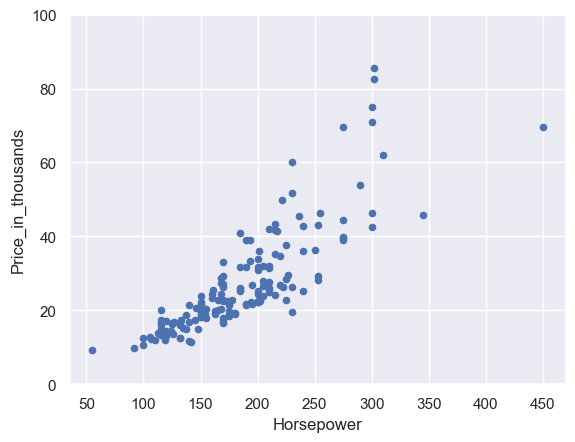

In [999]:
# bivariate analysis Price_in_thousands/Horsepower
var = "Horsepower"
data = pd.concat([df["Price_in_thousands"], df[var]], axis = 1)
data.plot.scatter(x = var, y = "Price_in_thousands", ylim = (0,100))

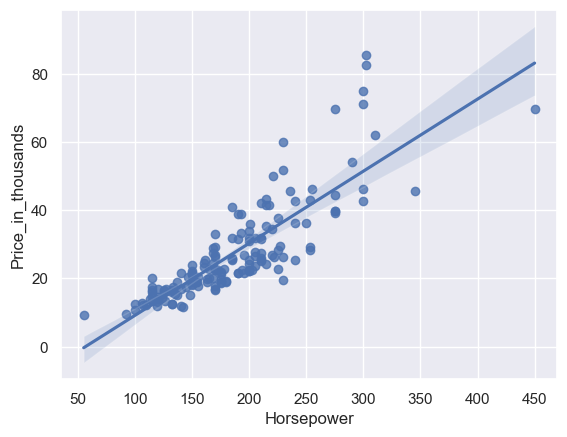

In [1000]:
sb.regplot(x = "Horsepower", y = "Price_in_thousands", data = df, dropna = True)
plt.show()

#positive association - as Horsepower increases, so does Price_in_thousands
#linear relationship - Price_in_thousands increases by approximately the same rate as Horsepower changes by one unit
#moderate relationship

#there is a moderate, positive, linear relationship between Horsepower and Price_in_thousands

<AxesSubplot: xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

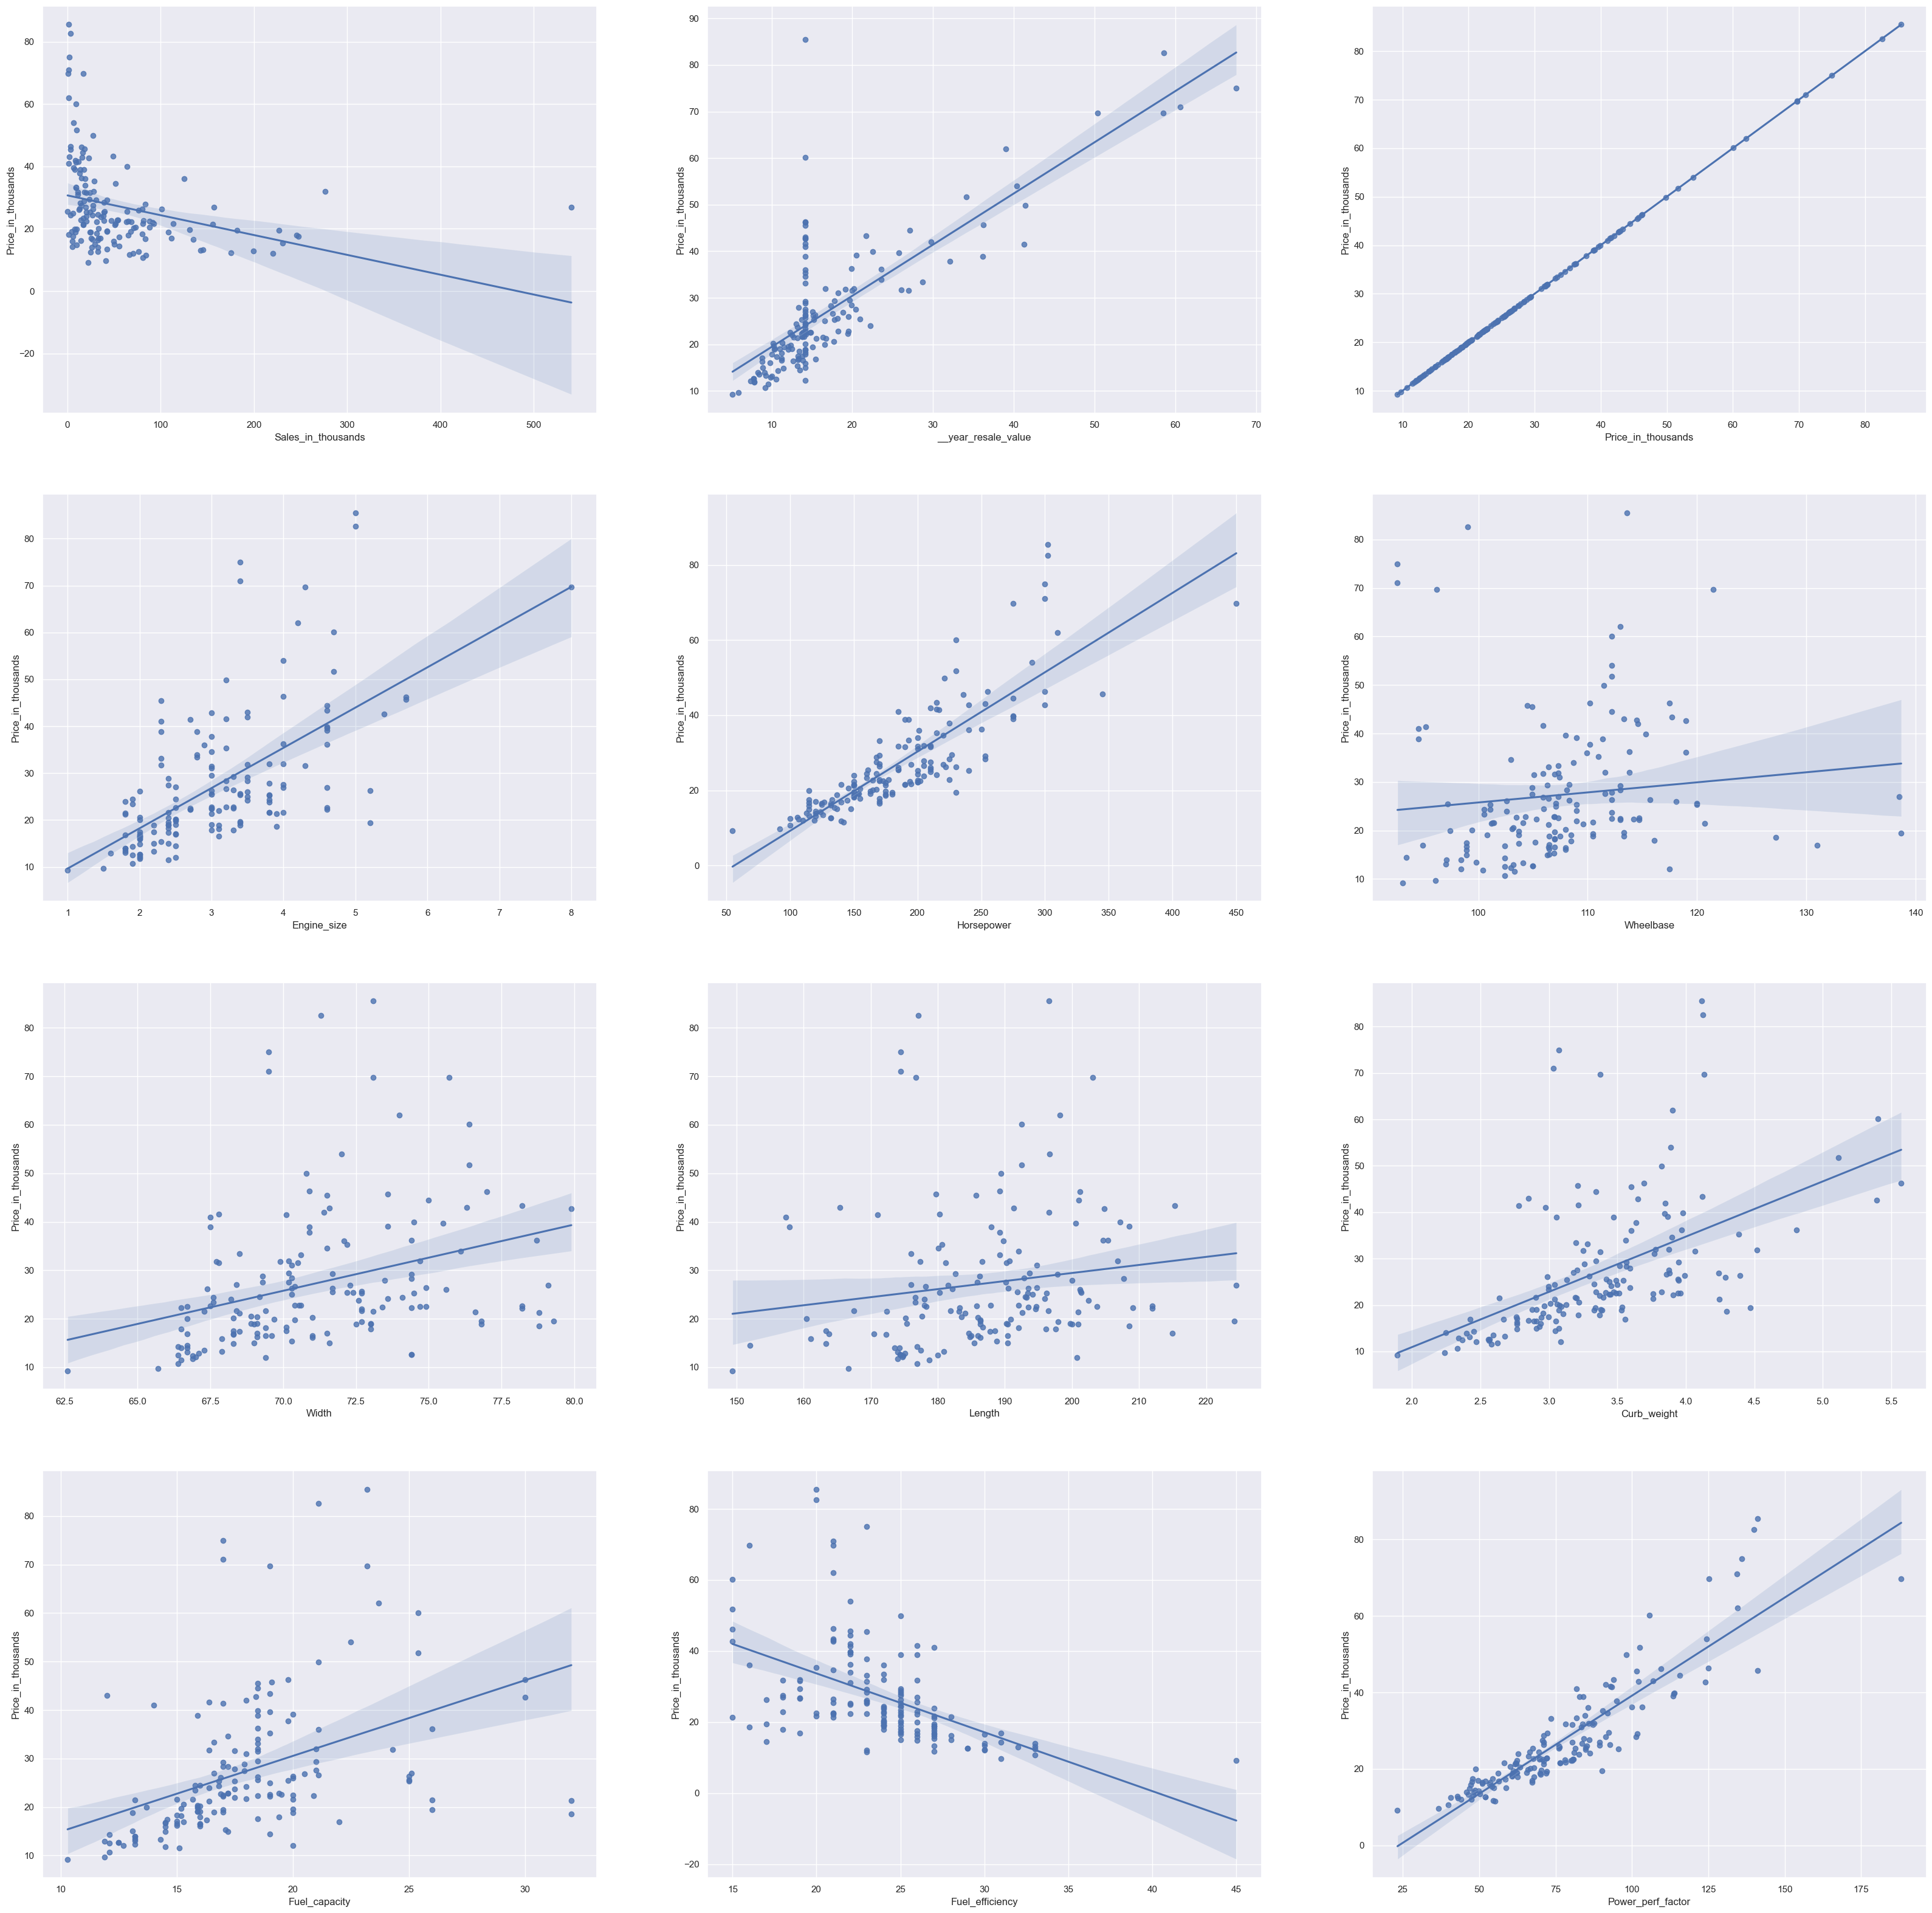

In [1001]:
fig, axs = plt.subplots(4, 3, figsize = (40, 40))

# row 1
sb.regplot(x = "Sales_in_thousands", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 0])
sb.regplot(x = "__year_resale_value", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 1])
sb.regplot(x = "Price_in_thousands", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 2])

# row 2
sb.regplot(x = "Engine_size", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 0])
sb.regplot(x = "Horsepower", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 1])
sb.regplot(x = "Wheelbase", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 2])

# row 3
sb.regplot(x = "Width", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 0])
sb.regplot(x = "Length", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 1])
sb.regplot(x = "Curb_weight", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 2])

# row 4
sb.regplot(x = "Fuel_capacity", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 0])
sb.regplot(x = "Fuel_efficiency", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 1])
sb.regplot(x = "Power_perf_factor", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 2])

REMOVING OUTLIERS

In [1002]:
# Sales_in_thousands plot
# df.sort_values(by = "Sales_in_thousands", ascending = False)[:2]

# __year_resale_value plot
# df.sort_values(by = "Price_in_thousands", ascending = False)[:10]

# Horsepower plot
df.sort_values(by = "Horsepower", ascending = False)[:15]

Manufacturer  Manufacturer_tier           Model  Sales_in_thousands  \
39         Dodge                  1           Viper               0.916   
24     Chevrolet                  1        Corvette              17.947   
6           Audi                  2              A8               1.380   
95    Mercedes-B                  2        SL-Class               3.311   
99    Mercedes-B                  2           CL500               0.954   
78       Lincoln                  2       Navigator              22.925   
126      Porsche                  2  Carrera Cabrio               1.866   
125      Porsche                  2   Carrera Coupe               1.280   
72         Lexus                  2           GS400               3.334   
73         Lexus                  2           LS400               6.375   
14      Cadillac                  2         DeVille              63.729   
94    Mercedes-B                  2         S-Class              16.774   
16      Cadillac                  2        Eldorado               6.536   
15      Cadillac                  2         Seville              15.943   
76       Lincoln                  2     Continental              13.798   

     __year_resale_value Vehicle_type  Price_in_thousands  Engine_size  \
39                58.470    Passenger              69.725          8.0   
24                36.225    Passenger              45.705          5.7   
6                 39.000    Passenger              62.000          4.2   
95                58.600    Passenger              82.600          5.0   
99                14.180    Passenger              85.500          5.0   
78                14.180          Car              42.660          5.4   
126               67.550    Passenger              74.970          3.4   
125               60.625    Passenger              71.020          3.4   
72                14.180    Passenger              46.305          4.0   
73                40.375    Passenger              54.005          4.0   
14                22.525    Passenger              39.895          4.6   
94                50.375    Passenger              69.700          4.3   
16                25.725    Passenger              39.665          4.6   
15                27.100    Passenger              44.475          4.6   
76                20.525    Passenger              39.080          4.6   

     Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
39        450.0       96.2   75.7   176.7        3.375           19.0   
24        345.0      104.5   73.6   179.7        3.210           19.1   
6         310.0      113.0   74.0   198.2        3.902           23.7   
95        302.0       99.0   71.3   177.1        4.125           21.1   
99        302.0      113.6   73.1   196.6        4.115           23.2   
78        300.0      119.0   79.9   204.8        5.393           30.0   
126       300.0       92.6   69.5   174.5        3.075           17.0   
125       300.0       92.6   69.5   174.5        3.032           17.0   
72        300.0      110.2   70.9   189.2        3.693           19.8   
73        290.0      112.2   72.0   196.7        3.890           22.5   
14        275.0      115.3   74.5   207.2        3.978           18.5   
94        275.0      121.5   73.1   203.1        4.133           23.2   
16        275.0      108.0   75.5   200.6        3.843           19.0   
15        275.0      112.2   75.0   201.0        3.342           18.5   
76        275.0      109.0   73.6   208.5        3.868           20.0   

     Fuel_efficiency Latest_Launch  Power_perf_factor  Age  
39              16.0      8/7/2011         188.144323   11  
24              22.0     5/12/2012         141.141150   10  
6               21.0     2/27/2012         134.656858   10  
95              20.0     3/17/2011         139.982294   11  
99              20.0     4/11/2011         141.100985   11  
78              15.0    12/23/2012         123.972047   10  
126             23.0  

In [1003]:
# Sales_in_thousands plot
df.drop([56, 52], axis = 0, inplace = True)

# __year_resale_value plot
df.drop([99, 74], axis = 0, inplace = True)

# Horsepower plot
df.drop([95, 126, 125, 94], axis = 0, inplace = True)

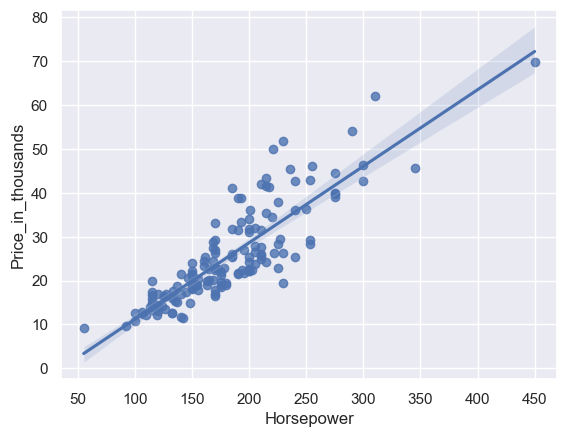

In [1004]:
sb.regplot(x = "Horsepower", y = "Price_in_thousands", data = df, dropna = True)
plt.show()

<AxesSubplot: xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

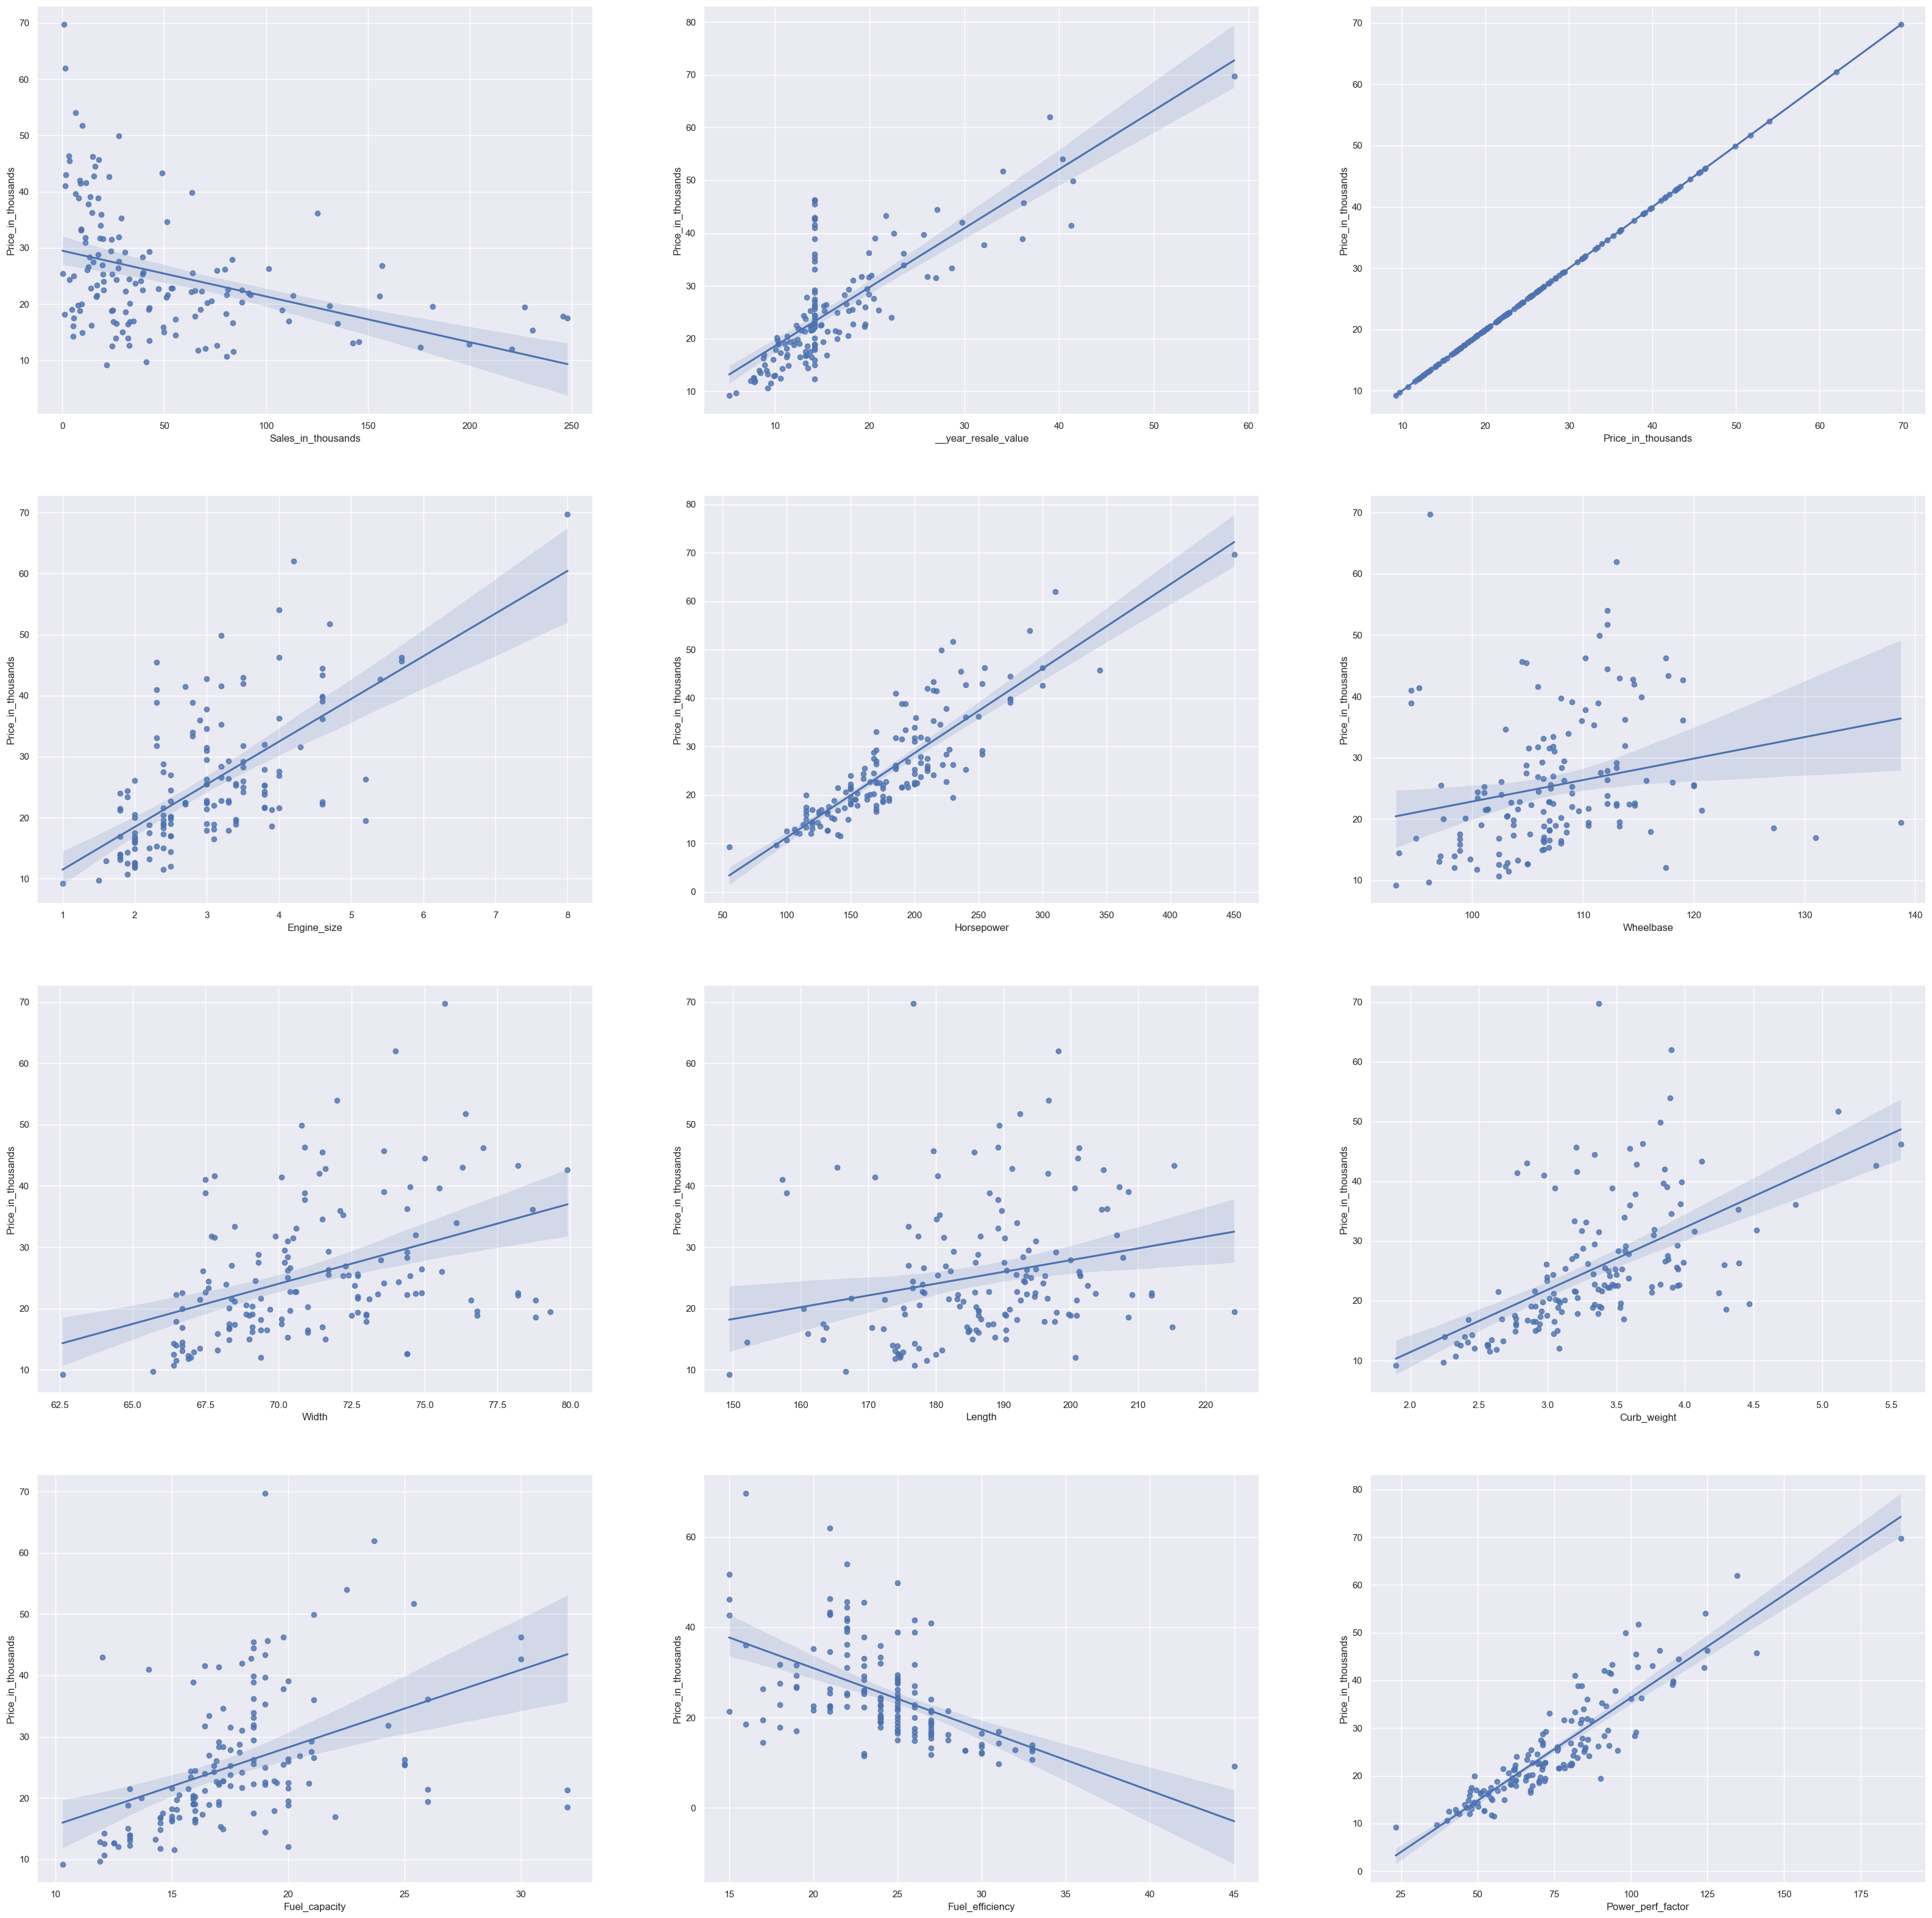

In [1005]:
fig, axs = plt.subplots(4, 3, figsize = (40, 40))

# row 1
sb.regplot(x = "Sales_in_thousands", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 0])
sb.regplot(x = "__year_resale_value", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 1])
sb.regplot(x = "Price_in_thousands", y = "Price_in_thousands", data = df, dropna = True, ax = axs[0, 2])

# row 2
sb.regplot(x = "Engine_size", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 0])
sb.regplot(x = "Horsepower", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 1])
sb.regplot(x = "Wheelbase", y = "Price_in_thousands", data = df, dropna = True, ax = axs[1, 2])

# row 3
sb.regplot(x = "Width", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 0])
sb.regplot(x = "Length", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 1])
sb.regplot(x = "Curb_weight", y = "Price_in_thousands", data = df, dropna = True, ax = axs[2, 2])

# row 4
sb.regplot(x = "Fuel_capacity", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 0])
sb.regplot(x = "Fuel_efficiency", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 1])
sb.regplot(x = "Power_perf_factor", y = "Price_in_thousands", data = df, dropna = True, ax = axs[3, 2])

Homoscedasticity

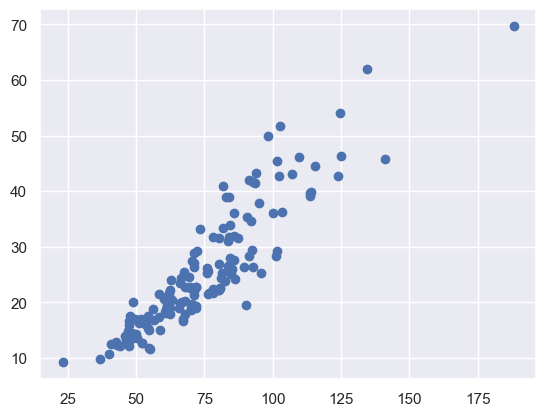

In [1006]:
plt.scatter(df["Power_perf_factor"], df["Price_in_thousands"])

<AxesSubplot: xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

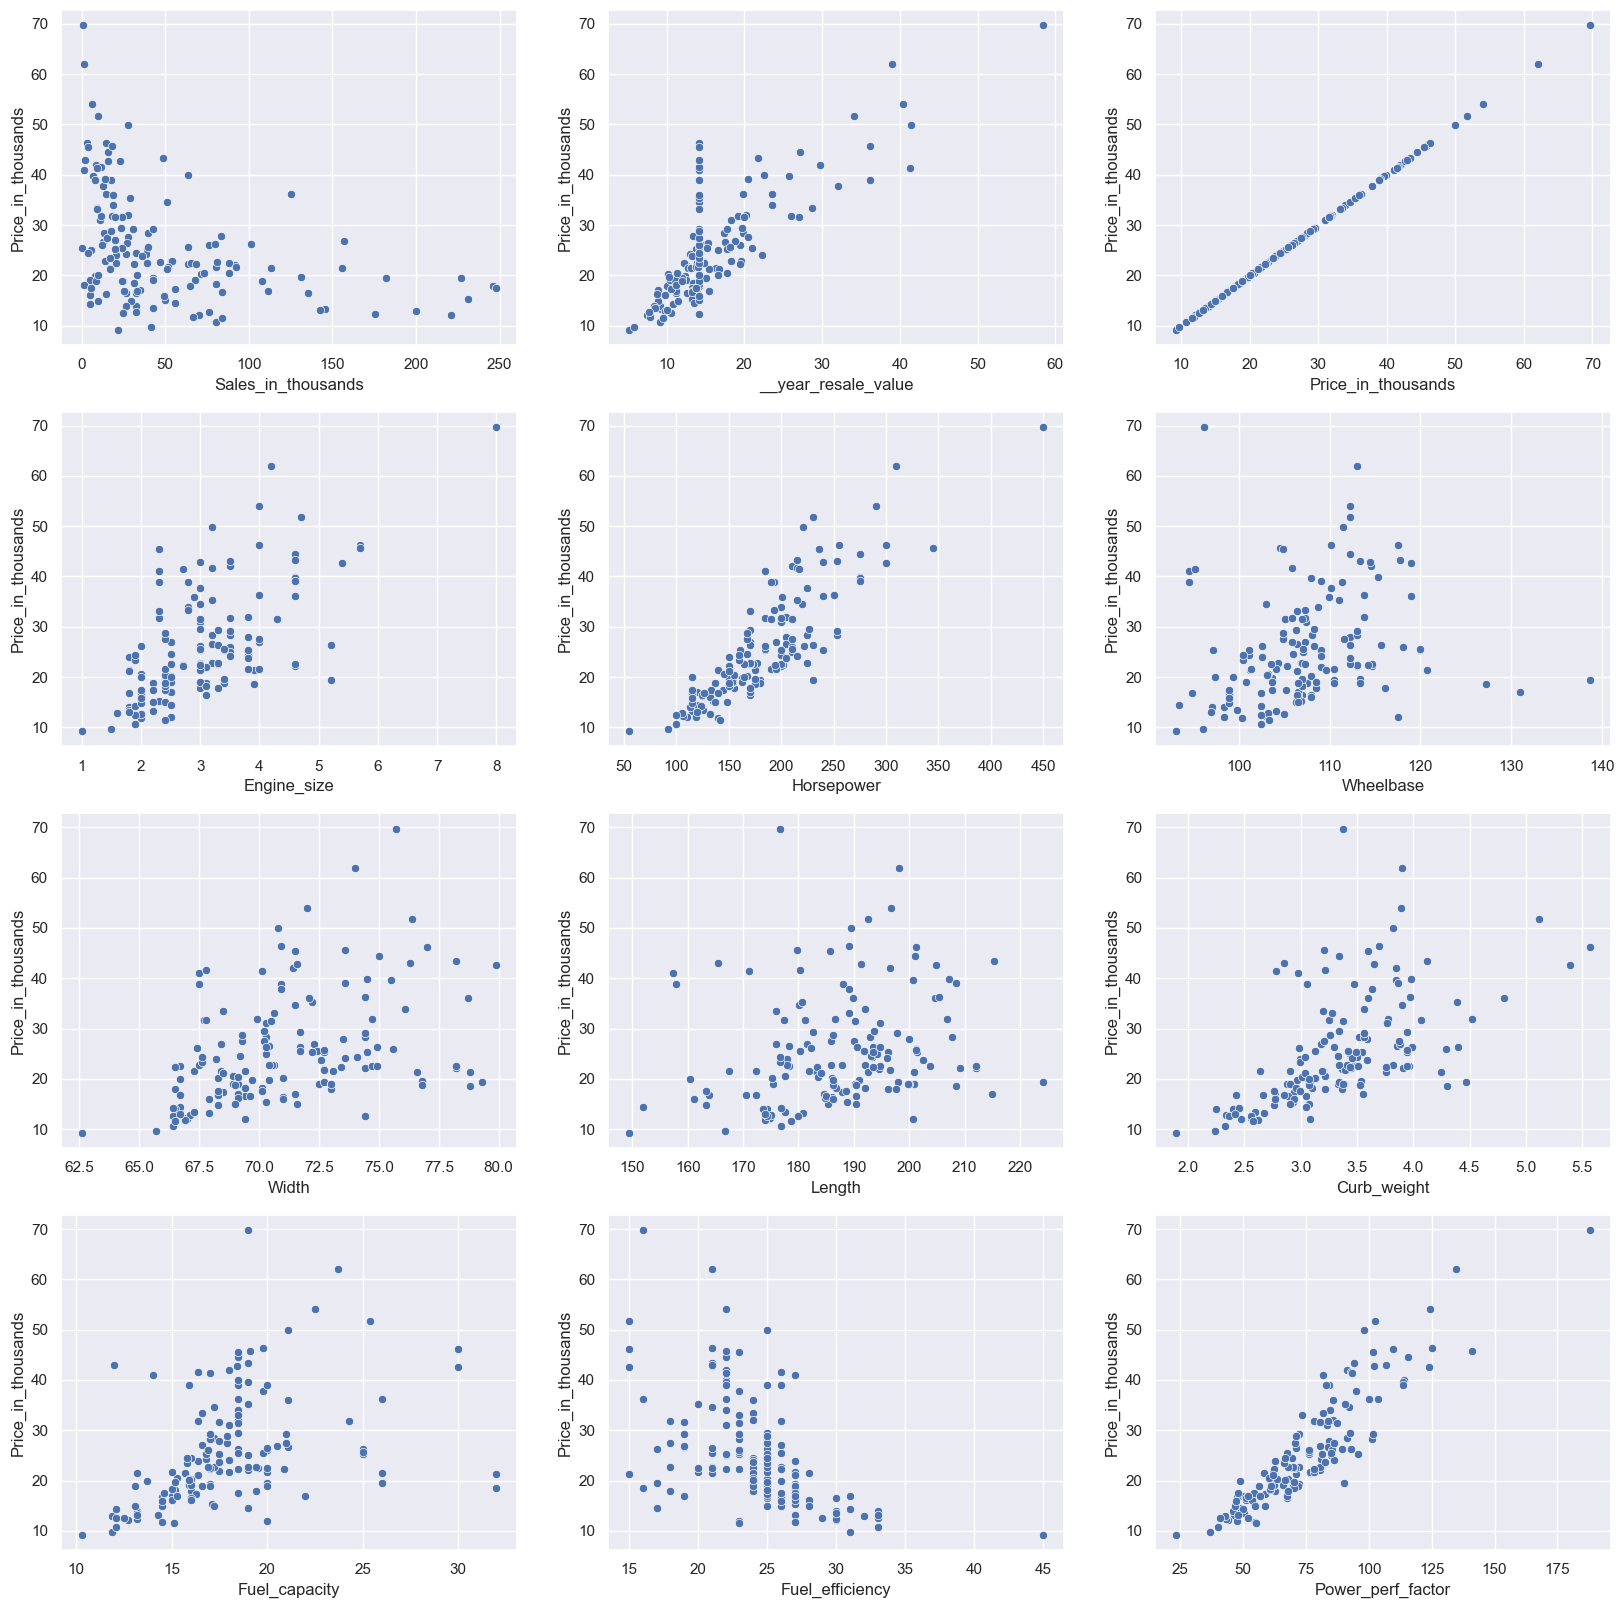

In [1007]:
# scatter plot
fig, axs = plt.subplots(4, 3, figsize = (20, 20))

# row 1
sb.scatterplot(x = df["Sales_in_thousands"], y = df["Price_in_thousands"], ax = axs[0, 0])
sb.scatterplot(x = df["__year_resale_value"], y = df["Price_in_thousands"], ax = axs[0, 1])
sb.scatterplot(x = df["Price_in_thousands"], y = df["Price_in_thousands"], ax = axs[0, 2])

# row 2
sb.scatterplot(x = df["Engine_size"], y = df["Price_in_thousands"], ax = axs[1, 0])
sb.scatterplot(x = df["Horsepower"], y = df["Price_in_thousands"], ax = axs[1, 1])
sb.scatterplot(x = df["Wheelbase"], y = df["Price_in_thousands"], ax = axs[1, 2])

# row 3
sb.scatterplot(x = df["Width"], y = df["Price_in_thousands"], ax = axs[2, 0])
sb.scatterplot(x = df["Length"], y = df["Price_in_thousands"], ax = axs[2, 1])
sb.scatterplot(x = df["Curb_weight"], y = df["Price_in_thousands"], ax = axs[2, 2])

# row 4
sb.scatterplot(x = df["Fuel_capacity"], y = df["Price_in_thousands"], ax = axs[3, 0])
sb.scatterplot(x = df["Fuel_efficiency"], y = df["Price_in_thousands"], ax = axs[3, 1])
sb.scatterplot(x = df["Power_perf_factor"], y = df["Price_in_thousands"], ax = axs[3, 2])

VERIFYING STATISTICAL ASSUMPTIONS

Normality

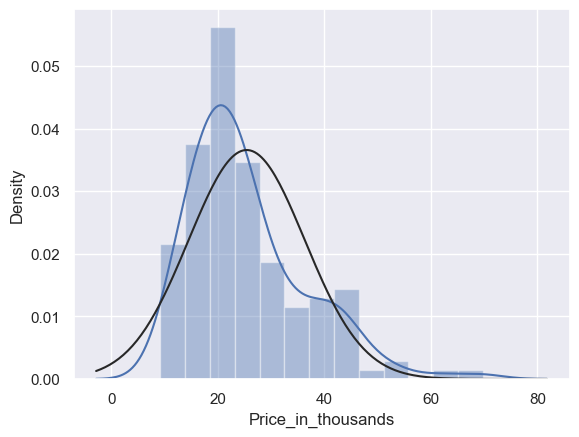

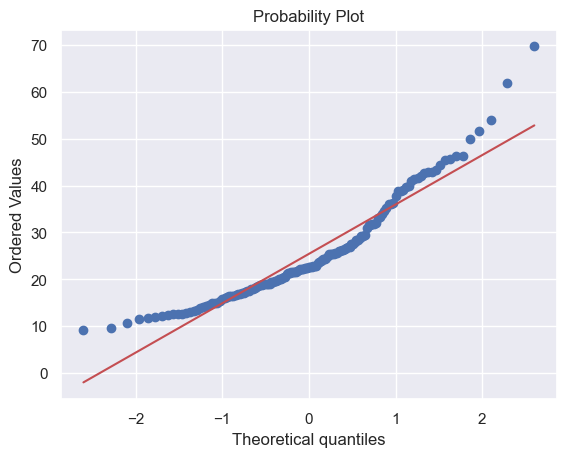

In [1008]:
# histogram and normal probability plot

sb.distplot(df["Price_in_thousands"], fit = norm)
fig = plt.figure()
res = stats.probplot(df["Price_in_thousands"], plot = plt)

<AxesSubplot: xlabel='Power_perf_factor', ylabel='Density'>

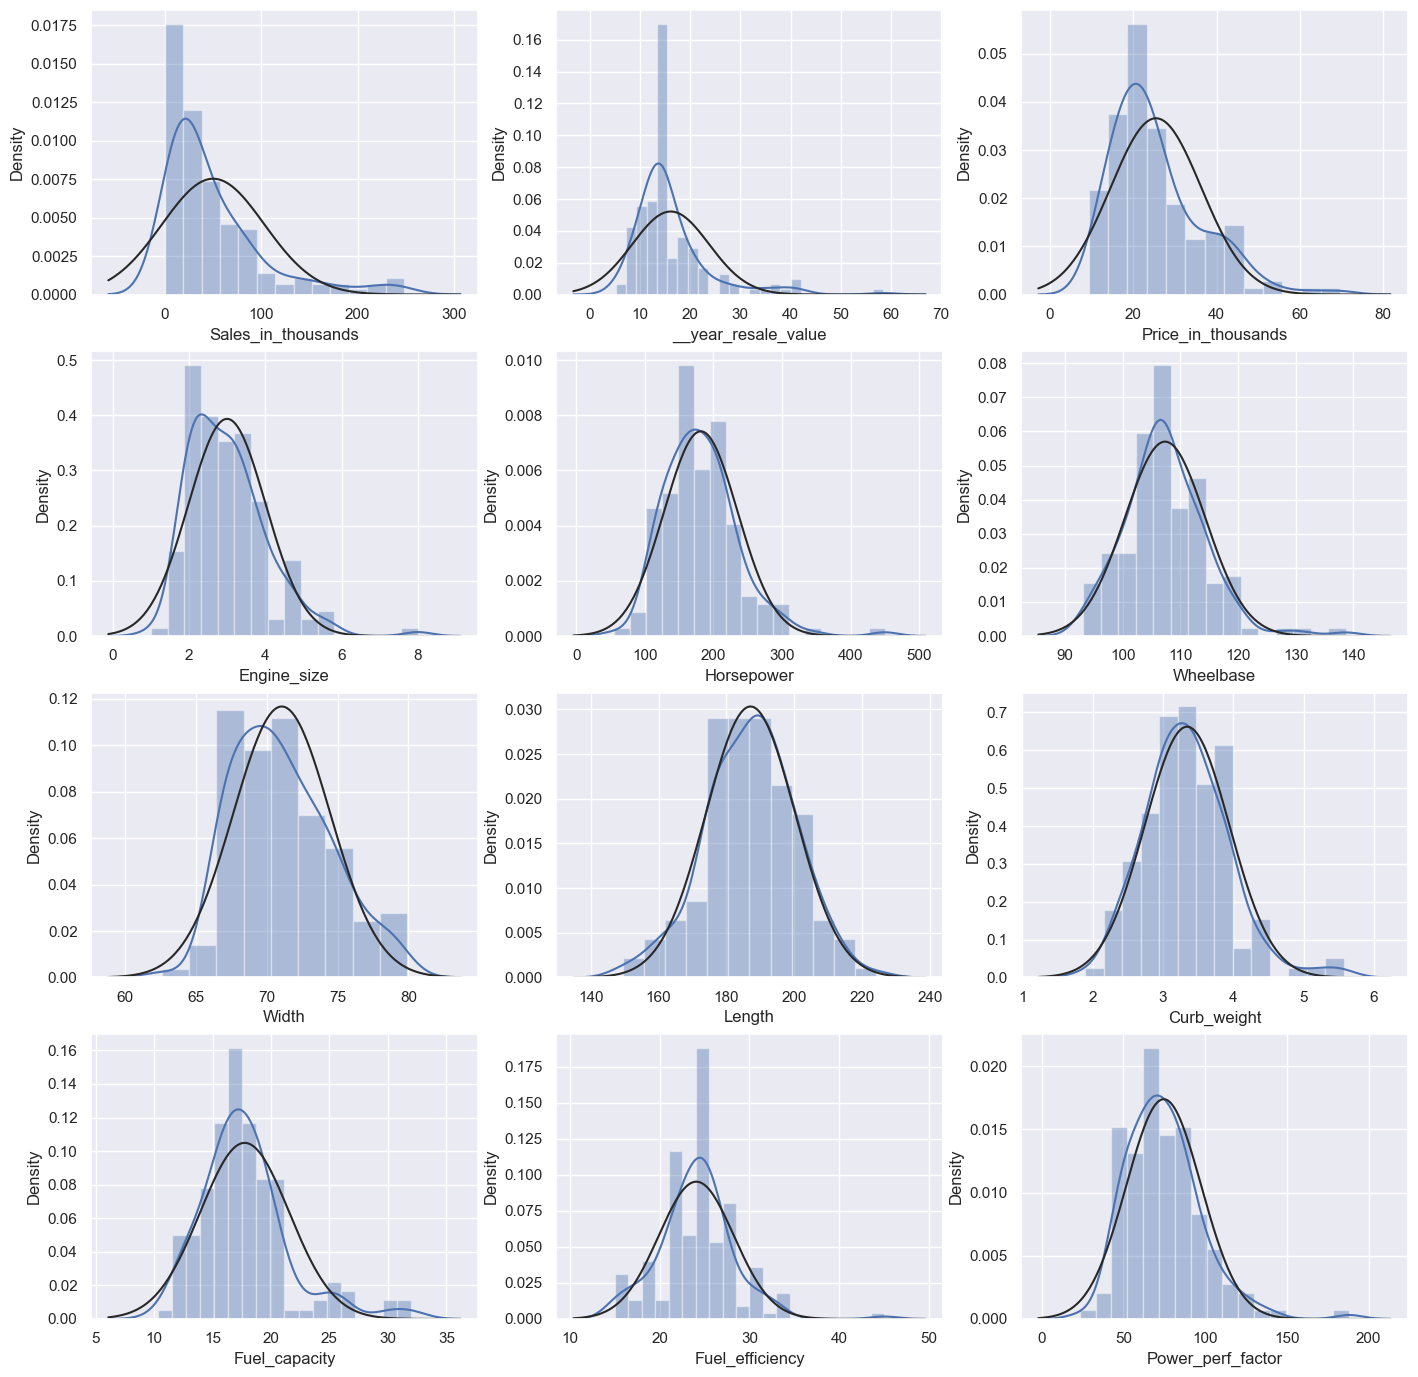

In [1009]:
fig, axs = plt.subplots(4, 3, figsize = (17, 17))

# row 1
sb.distplot(df["Sales_in_thousands"], fit = norm, ax = axs[0, 0])
sb.distplot(df["__year_resale_value"], fit = norm, ax = axs[0, 1])
sb.distplot(df["Price_in_thousands"], fit = norm, ax = axs[0, 2])

# row 2
sb.distplot(df["Engine_size"], fit = norm, ax = axs[1, 0])
sb.distplot(df["Horsepower"], fit = norm, ax = axs[1, 1])
sb.distplot(df["Wheelbase"], fit = norm, ax = axs[1, 2])

# row 3
sb.distplot(df["Width"], fit = norm, ax = axs[2, 0])
sb.distplot(df["Length"], fit = norm, ax = axs[2, 1])
sb.distplot(df["Curb_weight"], fit = norm, ax = axs[2, 2])

# row 4
sb.distplot(df["Fuel_capacity"], fit = norm, ax = axs[3, 0])
sb.distplot(df["Fuel_efficiency"], fit = norm, ax = axs[3, 1])
sb.distplot(df["Power_perf_factor"], fit = norm, ax = axs[3, 2])

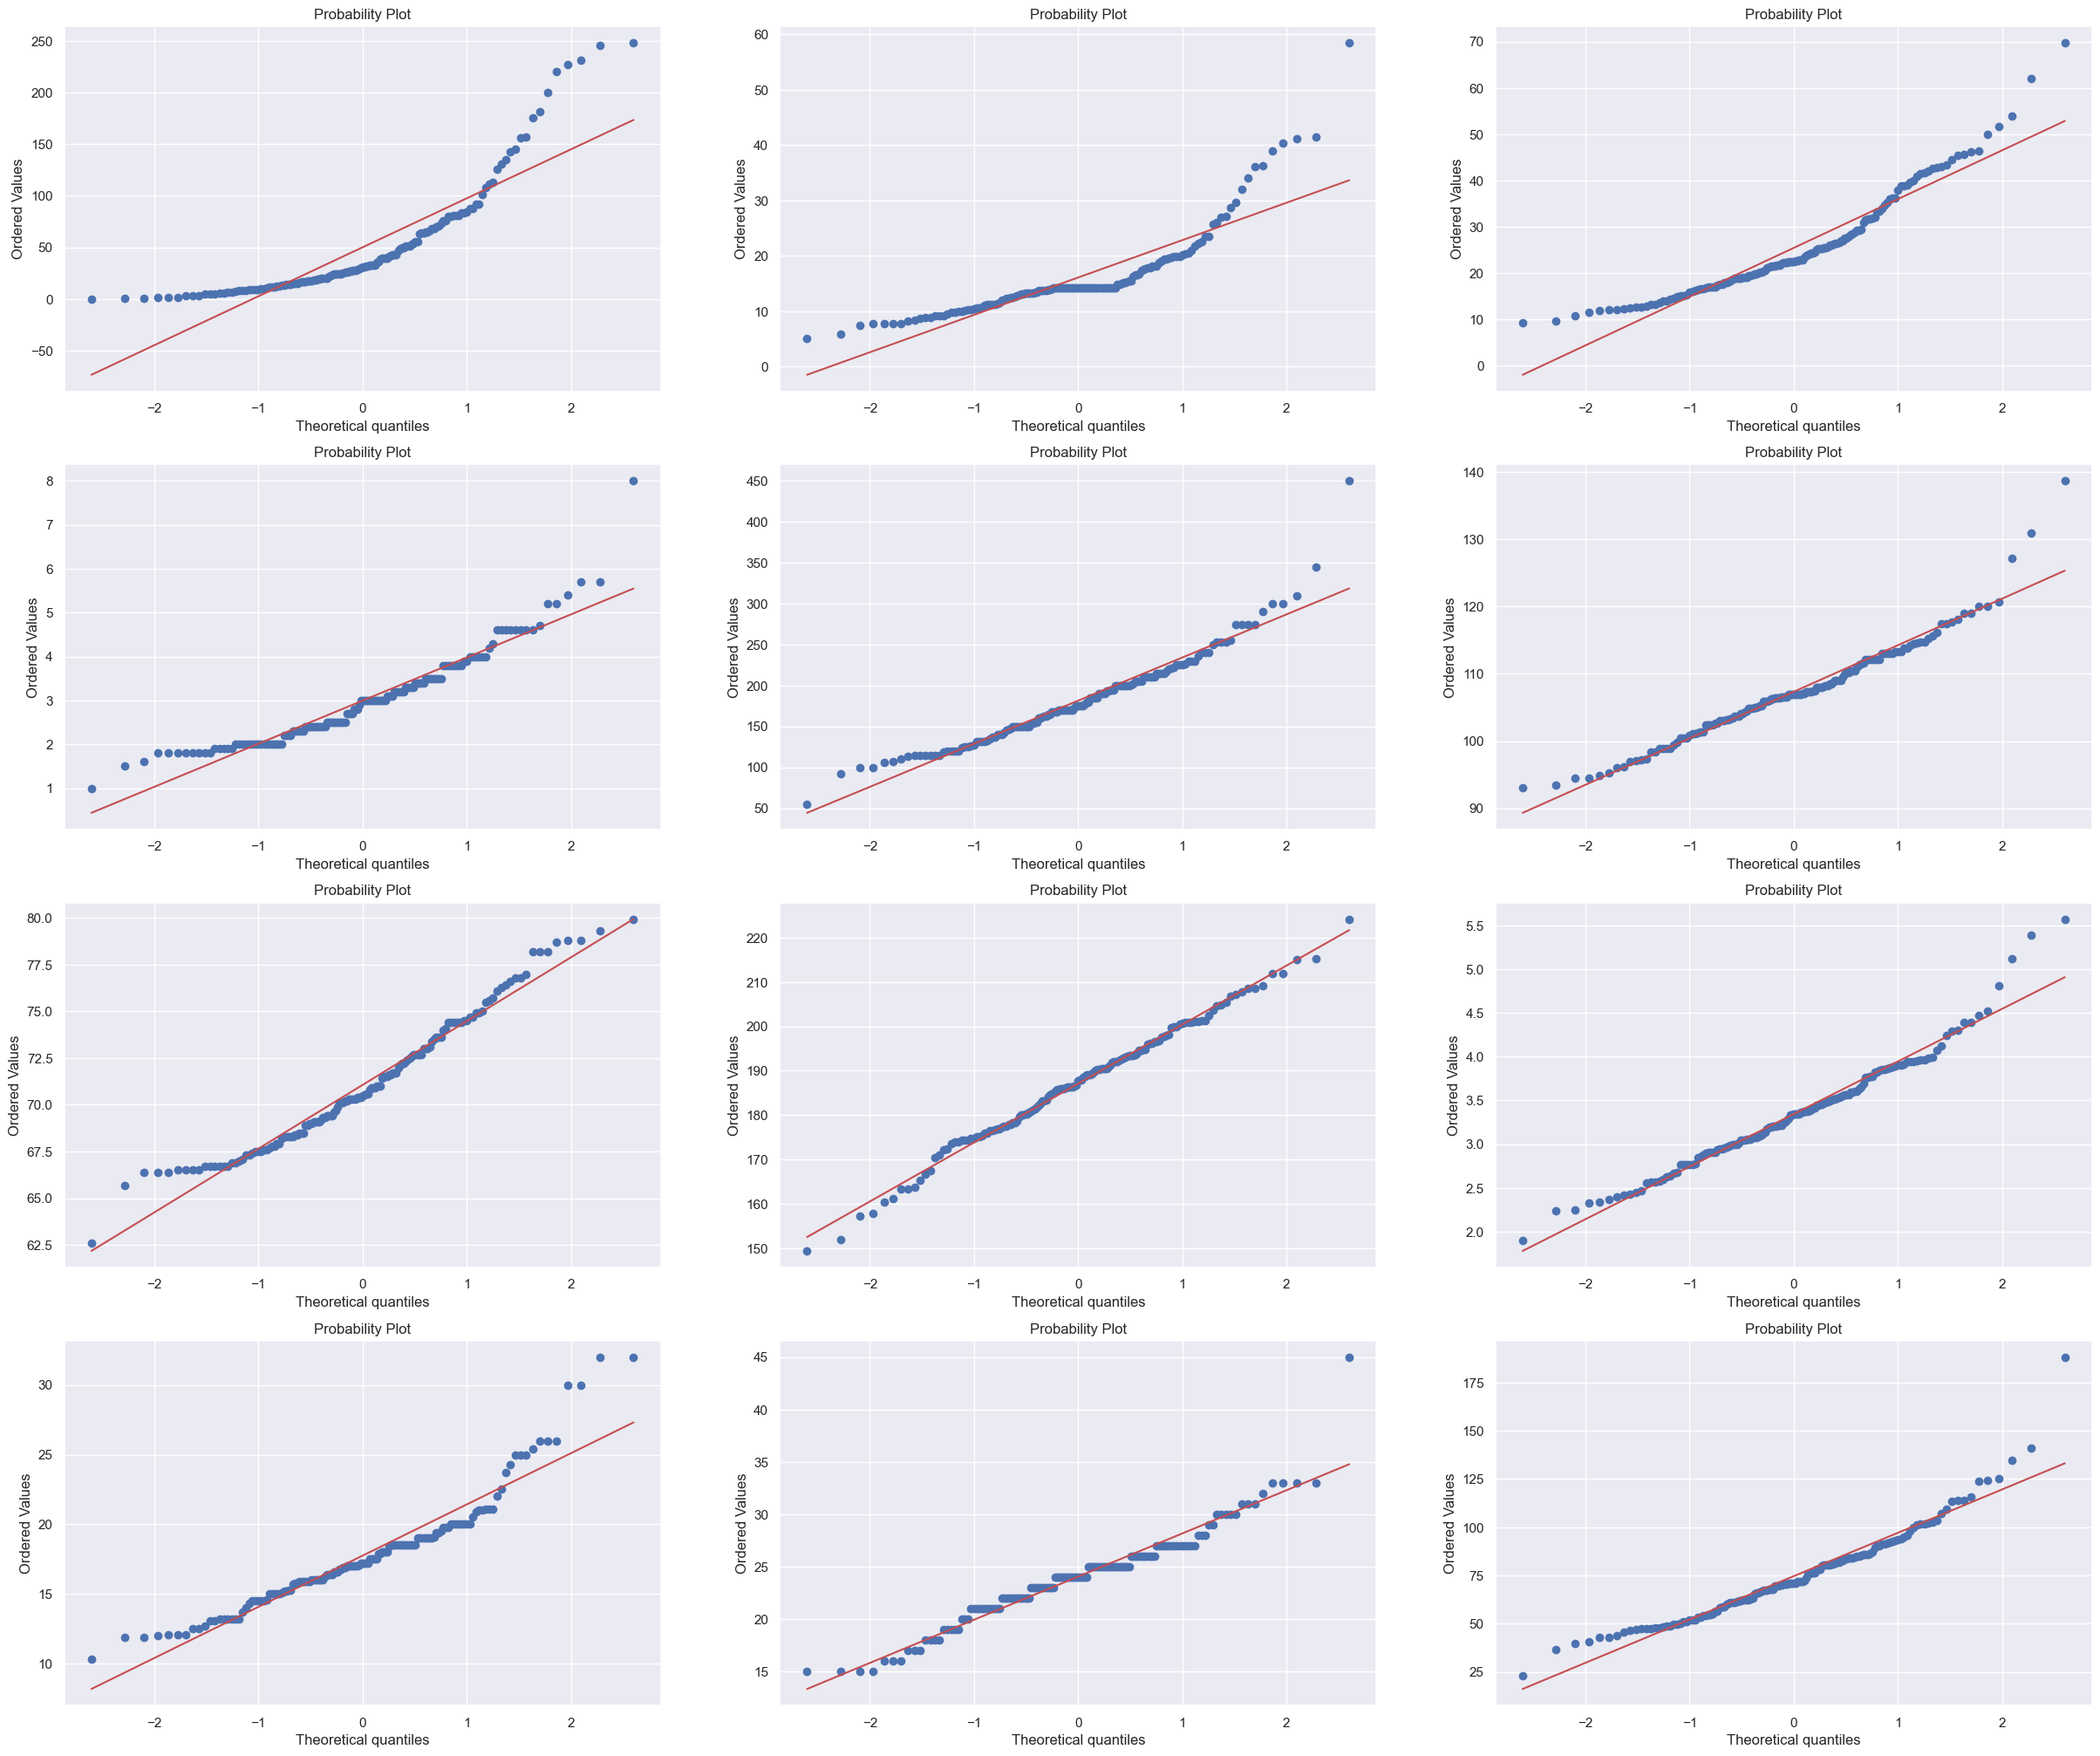

In [1010]:
fig, axs = plt.subplots(4, 3, figsize = (30, 25))

# row 1
res = stats.probplot(df["Sales_in_thousands"], plot = axs[0, 0])
res = stats.probplot(df["__year_resale_value"], plot = axs[0, 1])
res = stats.probplot(df["Price_in_thousands"], plot = axs[0, 2])

# row 2
res = stats.probplot(df["Engine_size"], plot = axs[1, 0])
res = stats.probplot(df["Horsepower"], plot = axs[1, 1])
res = stats.probplot(df["Wheelbase"], plot = axs[1, 2])

# row 3
res = stats.probplot(df["Width"], plot = axs[2, 0])
res = stats.probplot(df["Length"], plot = axs[2, 1])
res = stats.probplot(df["Curb_weight"], plot = axs[2, 2])

# row 4
res = stats.probplot(df["Fuel_capacity"], plot = axs[3, 0])
res = stats.probplot(df["Fuel_efficiency"], plot = axs[3, 1])
res = stats.probplot(df["Power_perf_factor"], plot = axs[3, 2])

<AxesSubplot: xlabel='Power_perf_factor', ylabel='Density'>

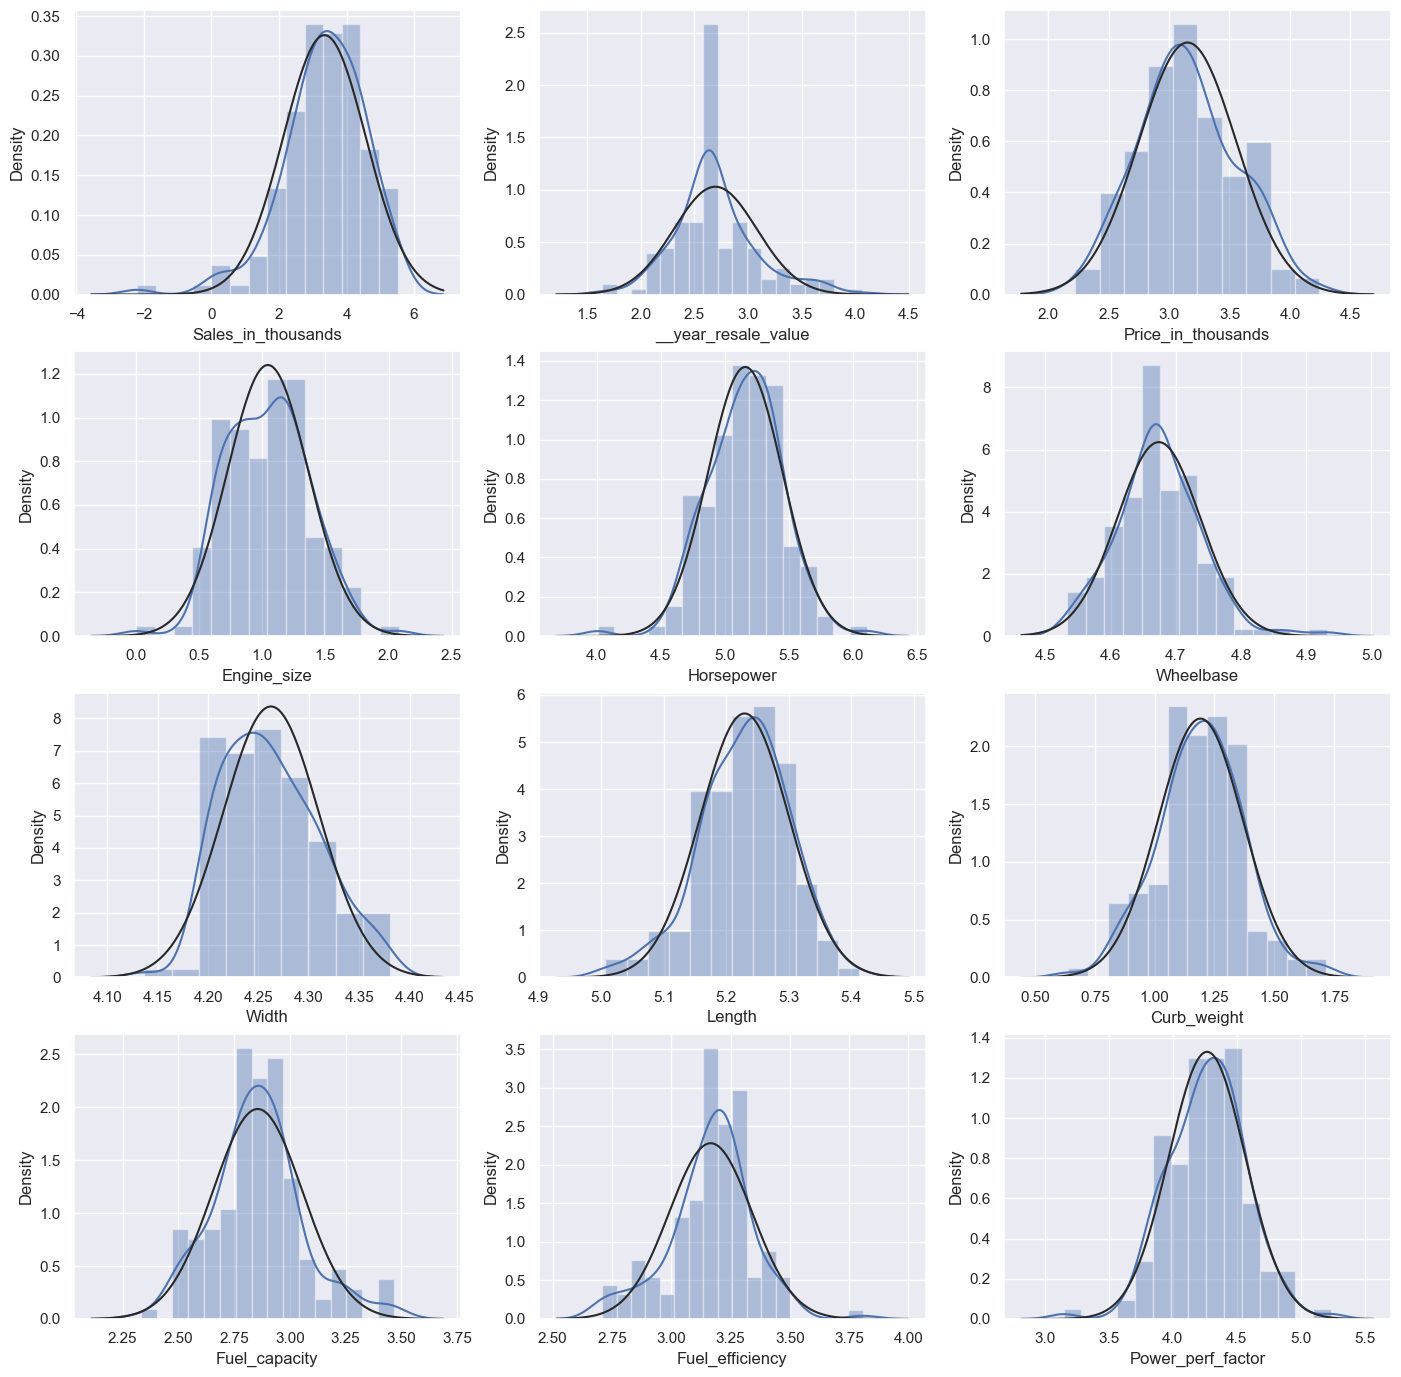

In [1011]:
# applying log transformation

df["Sales_in_thousands"] = np.log(df["Sales_in_thousands"])
df["__year_resale_value"] = np.log(df["__year_resale_value"])
df["Price_in_thousands"] = np.log(df["Price_in_thousands"])
df["Engine_size"] = np.log(df["Engine_size"])
df["Horsepower"] = np.log(df["Horsepower"])
df["Wheelbase"] = np.log(df["Wheelbase"])
df["Width"] = np.log(df["Width"])
df["Length"] = np.log(df["Length"])
df["Curb_weight"] = np.log(df["Curb_weight"])
df["Fuel_capacity"] = np.log(df["Fuel_capacity"])
df["Fuel_efficiency"] = np.log(df["Fuel_efficiency"])
df["Power_perf_factor"] = np.log(df["Power_perf_factor"])

# transformed histogram and normal probability plot

fig, axs = plt.subplots(4, 3, figsize = (17, 17))

# row 1
sb.distplot(df["Sales_in_thousands"], fit = norm, ax = axs[0, 0])
sb.distplot(df["__year_resale_value"], fit = norm, ax = axs[0, 1])
sb.distplot(df["Price_in_thousands"], fit = norm, ax = axs[0, 2])

# row 2
sb.distplot(df["Engine_size"], fit = norm, ax = axs[1, 0])
sb.distplot(df["Horsepower"], fit = norm, ax = axs[1, 1])
sb.distplot(df["Wheelbase"], fit = norm, ax = axs[1, 2])

# row 3
sb.distplot(df["Width"], fit = norm, ax = axs[2, 0])
sb.distplot(df["Length"], fit = norm, ax = axs[2, 1])
sb.distplot(df["Curb_weight"], fit = norm, ax = axs[2, 2])

# row 4
sb.distplot(df["Fuel_capacity"], fit = norm, ax = axs[3, 0])
sb.distplot(df["Fuel_efficiency"], fit = norm, ax = axs[3, 1])
sb.distplot(df["Power_perf_factor"], fit = norm, ax = axs[3, 2])

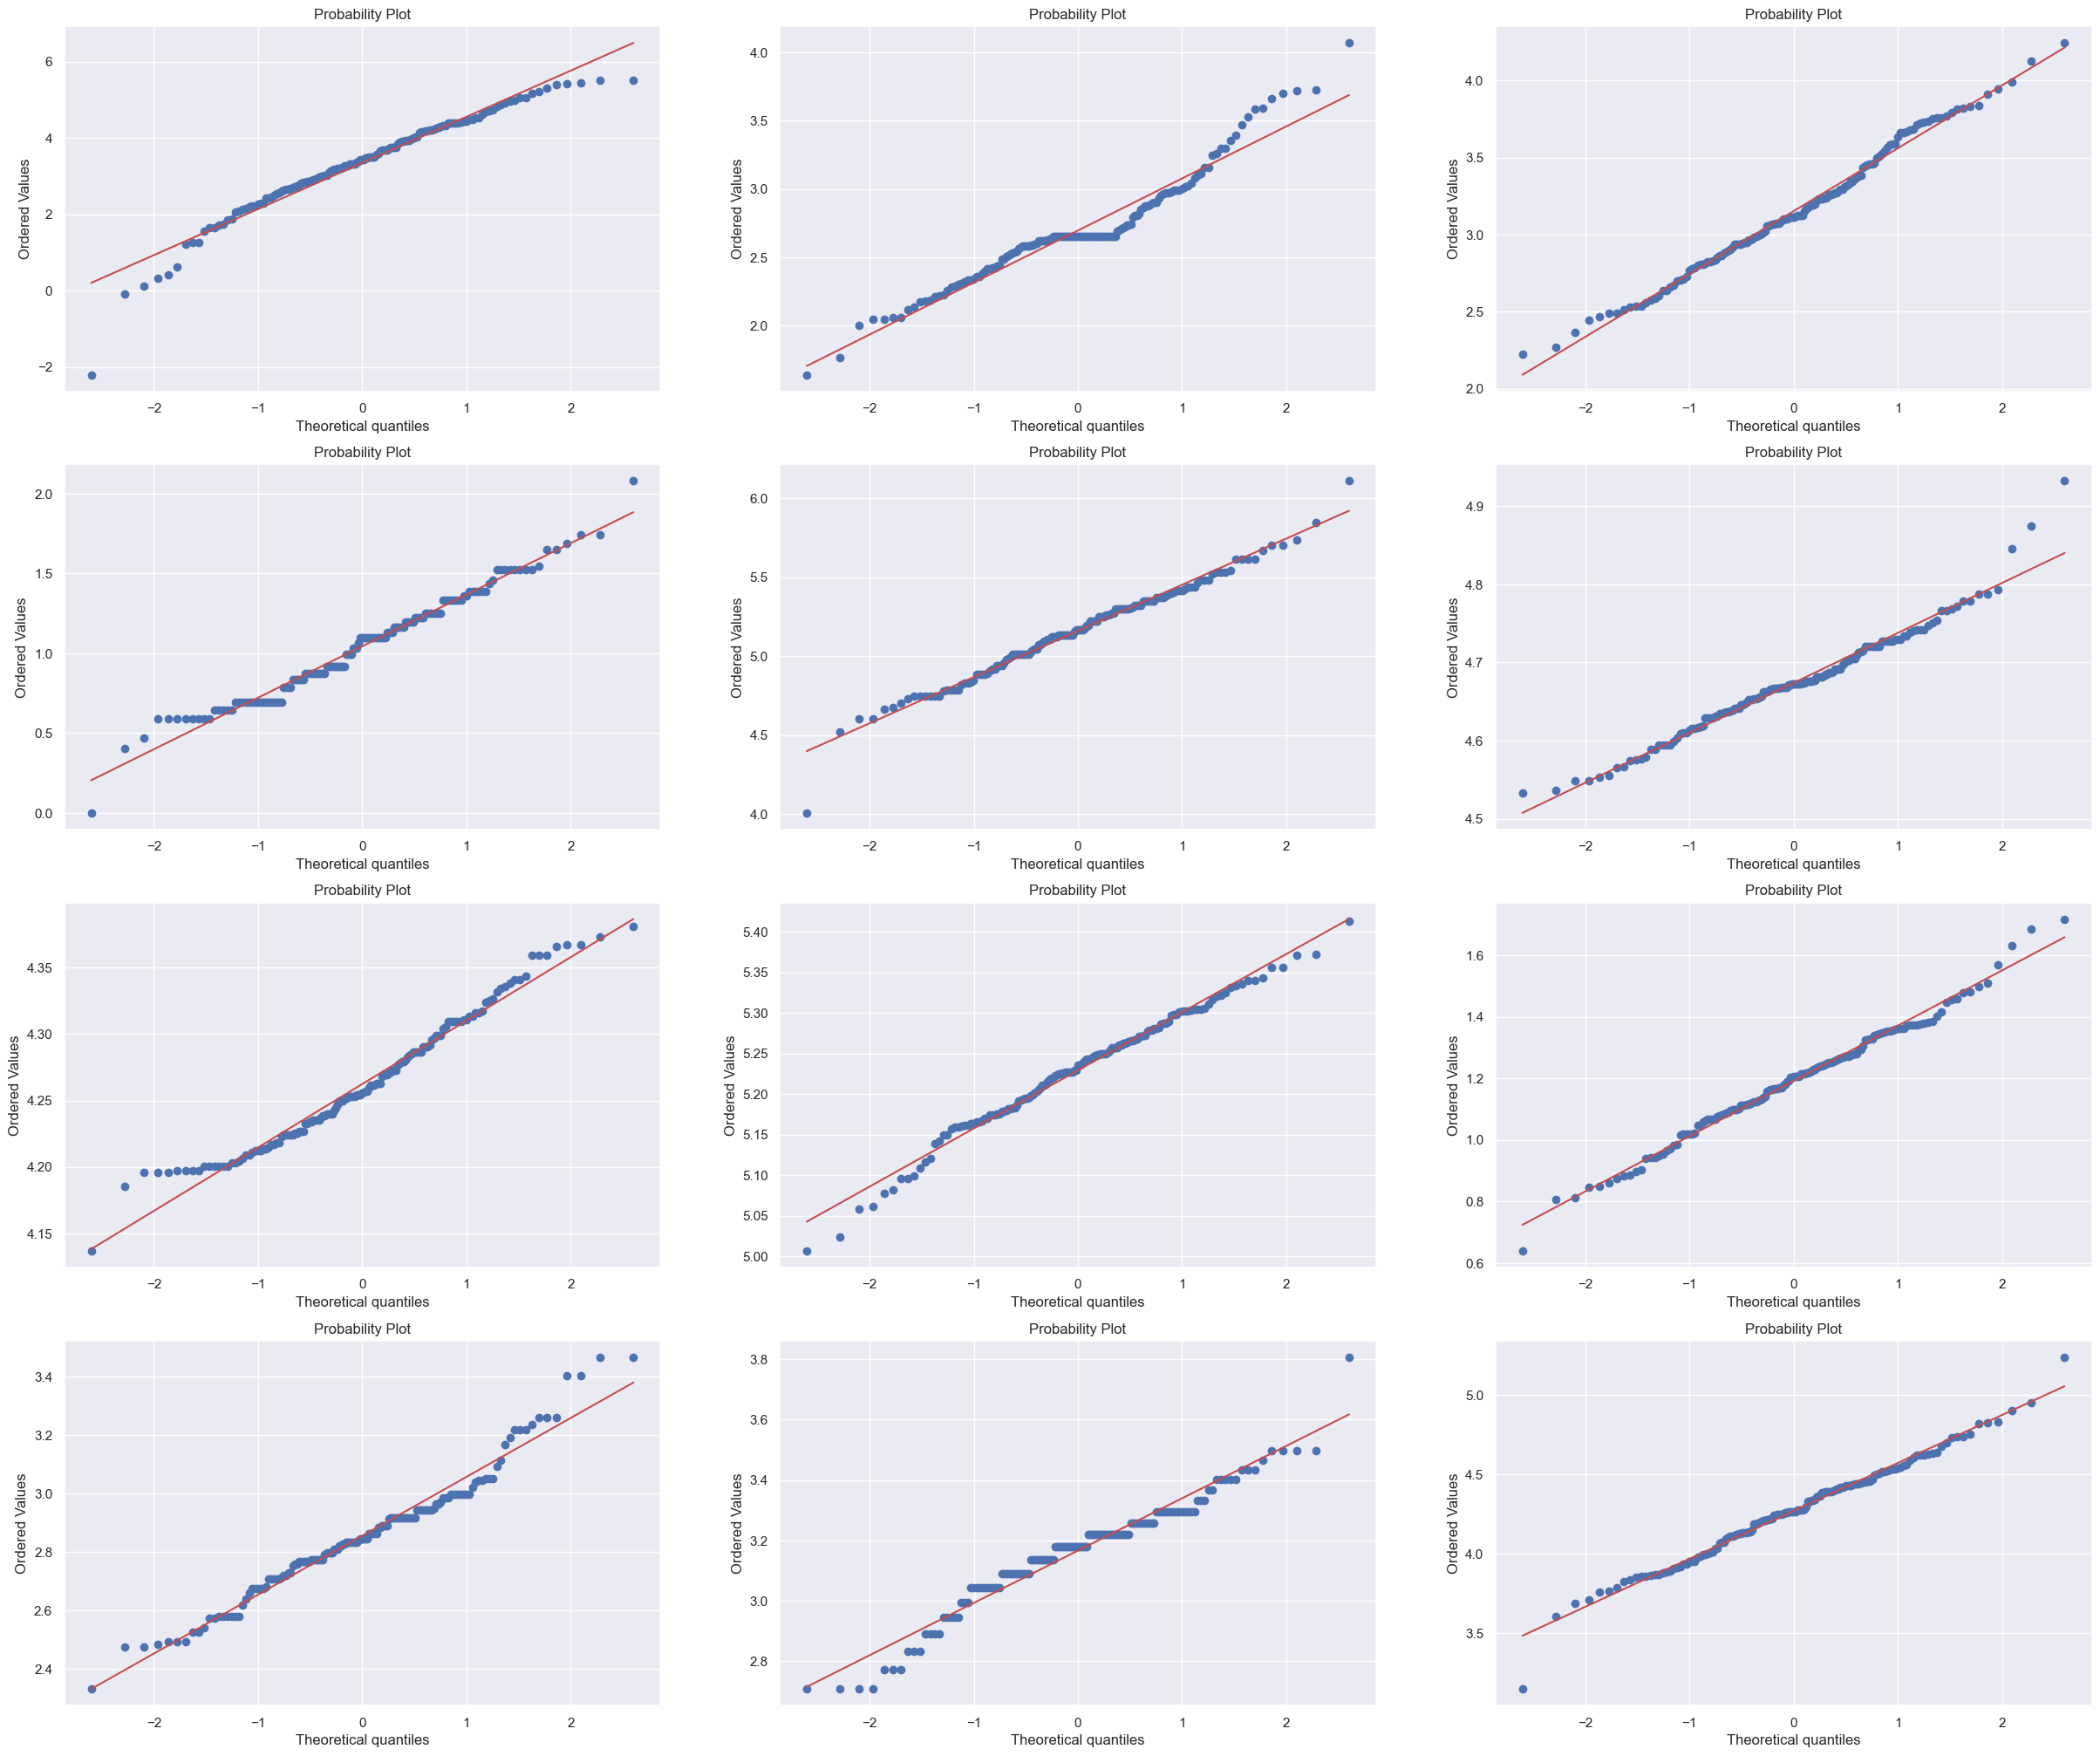

In [1012]:
fig, axs = plt.subplots(4, 3, figsize = (30, 25))

# row 1
res = stats.probplot(df["Sales_in_thousands"], plot = axs[0, 0])
res = stats.probplot(df["__year_resale_value"], plot = axs[0, 1])
res = stats.probplot(df["Price_in_thousands"], plot = axs[0, 2])

# row 2
res = stats.probplot(df["Engine_size"], plot = axs[1, 0])
res = stats.probplot(df["Horsepower"], plot = axs[1, 1])
res = stats.probplot(df["Wheelbase"], plot = axs[1, 2])

# row 3
res = stats.probplot(df["Width"], plot = axs[2, 0])
res = stats.probplot(df["Length"], plot = axs[2, 1])
res = stats.probplot(df["Curb_weight"], plot = axs[2, 2])

# row 4
res = stats.probplot(df["Fuel_capacity"], plot = axs[3, 0])
res = stats.probplot(df["Fuel_efficiency"], plot = axs[3, 1])
res = stats.probplot(df["Power_perf_factor"], plot = axs[3, 2])

In [1013]:
# drop unnecessary columns
df.drop(["Manufacturer"], axis = 1, inplace = True)
df.drop(["Model"], axis = 1, inplace = True)
df.drop(["Latest_Launch"], axis = 1, inplace = True)

In [1014]:
# convert categorical variable into dummy
df = pd.get_dummies(df)
df

Manufacturer_tier  Sales_in_thousands  __year_resale_value  \
0                    2            2.828437             2.794839   
1                    2            3.673360             2.989463   
2                    2            2.647167             2.902794   
3                    2            2.150366             3.391988   
4                    2            3.015388             3.102567   
..                 ...                 ...                  ...   
152                  2            1.265538             2.651833   
153                  2            2.724252             2.651833   
154                  2            2.863971             2.651833   
155                  2            1.250761             2.651833   
156                  2            2.942806             2.651833   

     Price_in_thousands  Engine_size  Horsepower  Wheelbase     Width  \
0              3.068053     0.587787    4.941642   4.617099  4.209160   
1              3.346389     1.163151    5.416100   4.683057  4.252772   
2              3.126717     1.163151    5.416100   4.671894  4.257030   
3              3.737670     1.252763    5.347108   4.741448  4.268298   
4              3.177637     0.587787    5.010635   4.630838  4.222445   
..                  ...          ...         ...        ...       ...   
152            3.194583     0.641854    5.075174   4.610158  4.213608   
153            3.314186     0.875469    5.123964   4.653008  4.238445   
154            3.360375     0.875469    5.123964   4.653008  4.238445   
155            3.817712     0.832909    5.463832   4.653008  4.269697   
156            3.583519     1.064711    5.303305   4.699571  4.278054   

       Length  Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  \
0    5.149817     0.970400       2.580217         3.332205           4.065262   
1    5.262172     1.257608       2.844909         3.218876           4.514926   
2    5.257495     1.244155       2.844909         3.258097           4.277095   
3    5.281171     1.348073       2.890372         3.091042           4.515134   
4    5.181784     1.097945       2.797281         3.295837           4.139599   
..        ...          ...            ...              ...                ...   
152  5.173887     1.112515       2.760010         3.218876           4.197184   
153  5.225209     1.165648       2.884801         3.218876           4.257802   
154  5.226821     1.181420       2.884801         3.218876           4.264874   
155  5.224132     1.281212       2.917771         3.135494           4.621273   
156  5.245971     1.280934       3.049273         3.178054           4.451269   

     Age  Vehicle_type_Car  Vehicle_type_Passenger  
0     10                 0                       1  
1     11                 0                       1  
2     10                 0                       1  
3     11                 0                       1  
4     11                 0                       1  
..   ...               ...                     ...  
152   11                 0                       1  
153   10                 0                       1  
154   11                 0                       1  
155   11                 0                       1  
156   11                 0                       1  

[149 rows x 16 columns]

In [1015]:
# on to modeling